# Домашнее задание № 1

Вам необходимо провести анализ и подготовить данные.

# Исходные данные

Ознакомьтесь с данными в [источнике](https://www.kaggle.com/uciml/student-alcohol-consumption?select=student-por.csv):

Если вкратце, то у вас есть 29 параметров и одна целевая переменная G3.

In [551]:
import pandas as pd

In [553]:
# Читаем данные

X_train = pd.read_csv('train_features_with_answers.csv')

In [555]:
# Про характеристики прочитайте в источнике

X_train.head(15)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,MS,M,NaN,U,LE3,T,1,3,at_home,services,...,yes,yes,4,3,3,2,3,3,0,9
1,GP,M,NaN,R,LE3,T,3,3,teacher,other,...,yes,no,3,3,4,3,5,3,16,12
2,GP,M,15.0,NaN,GT3,T,3,4,other,other,...,yes,no,5,5,1,1,1,5,0,13
3,MS,M,17.0,R,GT3,T,4,3,services,other,...,yes,yes,4,5,5,1,3,2,4,11
4,GP,F,20.0,R,GT3,T,2,1,other,other,...,yes,yes,1,2,3,1,2,2,8,12
5,GP,F,17.0,U,GT3,T,2,3,other,other,...,yes,yes,4,2,1,1,1,3,2,14
6,MS,F,18.0,U,GT3,T,3,3,other,other,...,yes,yes,4,1,3,1,2,1,1,16
7,MS,F,17.0,U,GT3,T,1,1,other,at_home,...,no,no,4,3,2,1,2,5,9,10
8,GP,F,15.0,U,GT3,T,1,1,other,other,...,yes,no,4,3,2,2,3,4,2,12
9,GP,M,18.0,U,GT3,T,2,1,other,other,...,yes,no,5,2,4,1,2,4,2,16


# Часть 1. Визуальный анализ данных (Exploratory Data Analysis)

Перед тем, как приступать к построению алгоритмов, необходимо понять данные, с которыми требуется работать. Для этого в подходах к построению алгоритмов машинного обучения выделят специальный этап - Разведочный анализ данных или Exploratory Data Analysis (EDA). EDA в себя включает все те, что касается описания данных: визуализацию, интерпретацию и анализ.

Прежде всего сделаем визуализацию данных для того, чтобы оценить диапазоны значений и виды их распределений.

Постройте для приведенных ниже характеристик следующие виды графиков:
- Гистограммы;
- Круговые диаграмм;
- Графики;
- Таблицы;
- 3D диаграммы.

Выберите наиболее подходящий тип графика для каждой характеристки.

__Основной критерий оценивания__ - читаемость и интерпретируемость данных.

In [649]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import scipy.stats as stats
from scipy.stats import spearmanr
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import KNNImputer, IterativeImputer
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, StratifiedShuffleSplit, GroupKFold, GroupShuffleSplit, ShuffleSplit, TimeSeriesSplit
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, make_scorer
from sklearn.experimental import enable_iterative_imputer
import warnings
warnings.filterwarnings('ignore')
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

## Характеристика: "Sex"

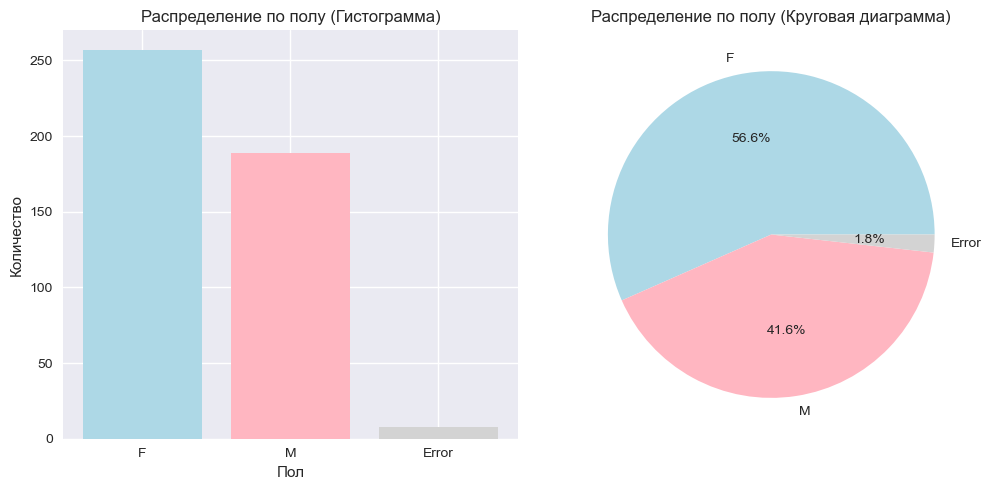

In [564]:
plt.figure(figsize=(15, 5))


def categorize_sex(value):
    if value == 'M':
        return 'M'
    elif value == 'F':
        return 'F'
    else:
        return 'Error'


X_train_sex_cat = X_train.copy()
X_train_sex_cat['sex_category'] = X_train_sex_cat['sex'].apply(categorize_sex)

# Гистограмма
plt.subplot(1, 3, 1)
sex_categorized = X_train['sex'].apply(categorize_sex)
sex_counts = sex_categorized.value_counts()
plt.bar(sex_counts.index, sex_counts.values, color=['lightblue', 'lightpink', 'lightgray'])
plt.title('Распределение по полу (Гистограмма)')
plt.xlabel('Пол')
plt.ylabel('Количество')

# Круговая диаграмма
plt.subplot(1, 3, 2)
sex_counts_cat = sex_categorized.value_counts()
plt.pie(sex_counts_cat.values, labels=sex_counts_cat.index, autopct='%1.1f%%', 
        colors=['lightblue', 'lightpink', 'lightgray'])
plt.title('Распределение по полу (Круговая диаграмма)')

plt.tight_layout()
plt.show()

## Характеристика: "Age"

Найдено 8 строк с некорректным возрастом (не в диапазоне 15-22)


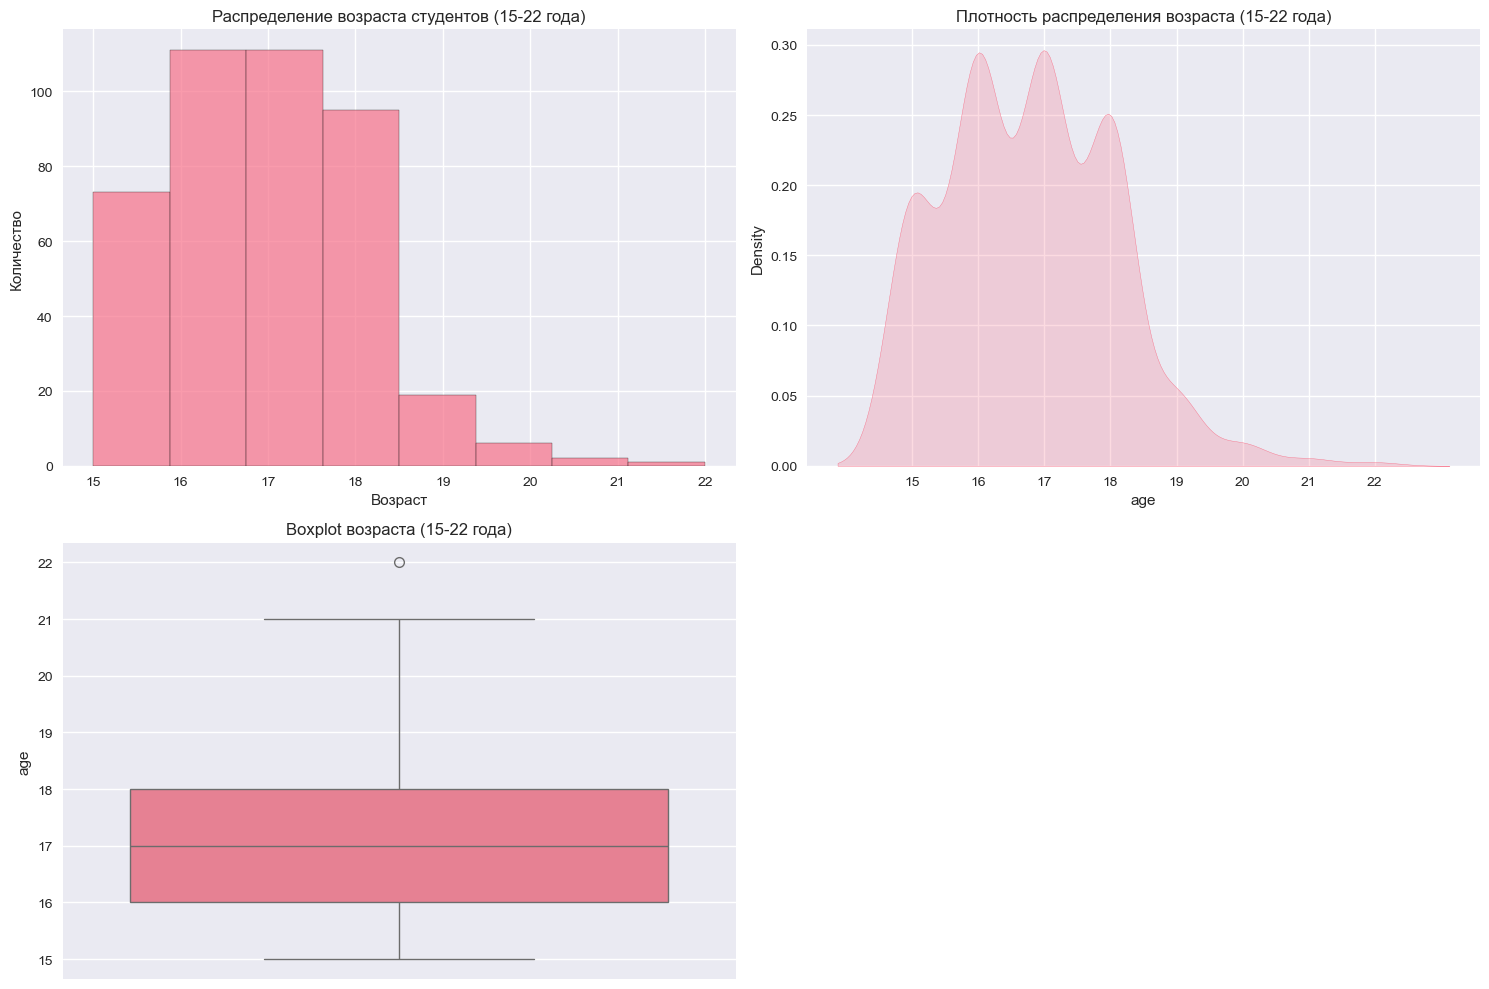

In [567]:
plt.figure(figsize=(15, 10))

age_filtered = X_train[(X_train['age'] >= 15) & (X_train['age'] <= 22)]
X_train_sex_cat = age_filtered.copy()
X_train_sex_cat['sex_category'] = X_train_sex_cat['sex'].apply(categorize_sex)

age_errors = X_train[(X_train['age'] < 15) | (X_train['age'] > 22)]
print(f"Найдено {len(age_errors)} строк с некорректным возрастом (не в диапазоне 15-22)")

# Гистограмма возраста
plt.subplot(2, 2, 1)
age_filtered['age'].hist(bins=8, edgecolor='black', alpha=0.7)
plt.title('Распределение возраста студентов (15-22 года)')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.xticks(range(15, 23))

# Плотность распределения
plt.subplot(2, 2, 2)
sns.kdeplot(data=age_filtered, x='age', fill=True)
plt.title('Плотность распределения возраста (15-22 года)')
plt.xticks(range(15, 23))

# Boxplot
plt.subplot(2, 2, 3)
sns.boxplot(data=age_filtered, y='age')
plt.title('Boxplot возраста (15-22 года)')
plt.xlabel('')

plt.tight_layout()
plt.show()

## Характеристика: "Weekly study time"

Кодировка:
1: <2 hours
2: 2 to 5 hours
3: 5 to 10 hours
4: >10 hours


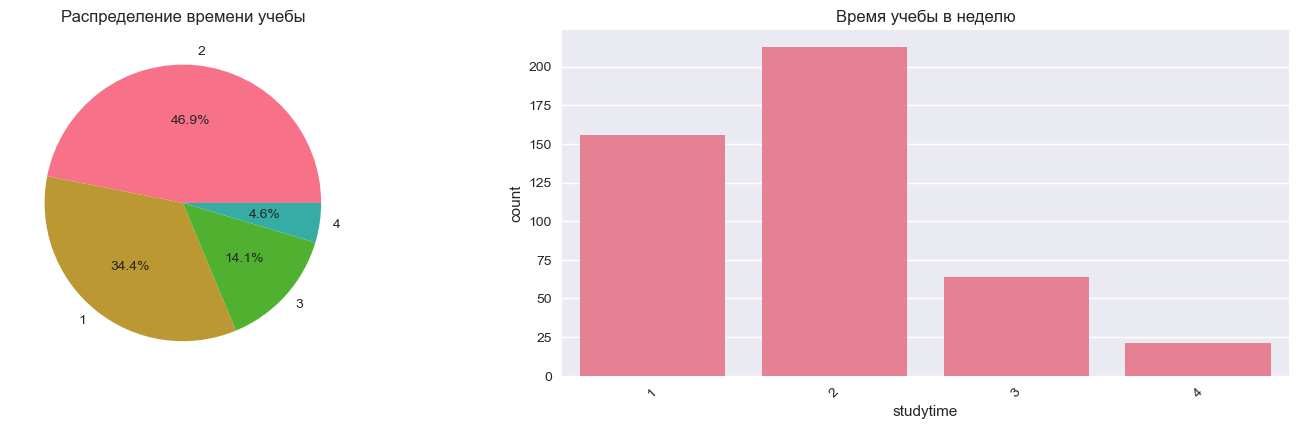

In [570]:
study_time_order = ['<2 hours', '2 to 5 hours', '5 to 10 hours', '>10 hours']
print('Кодировка:\n1: <2 hours\n2: 2 to 5 hours\n3: 5 to 10 hours\n4: >10 hours')

plt.figure(figsize=(15, 8))

# Круговая диаграмма
plt.subplot(2, 2, 1)
study_counts = X_train['studytime'].value_counts()
plt.pie(study_counts.values, labels=study_counts.index, autopct='%1.1f%%')
plt.title('Распределение времени учебы')

# Bar plot
plt.subplot(2, 2, 2)
sns.countplot(data=X_train, x='studytime')
plt.title('Время учебы в неделю')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Характеристика: "Romantic Relationship"

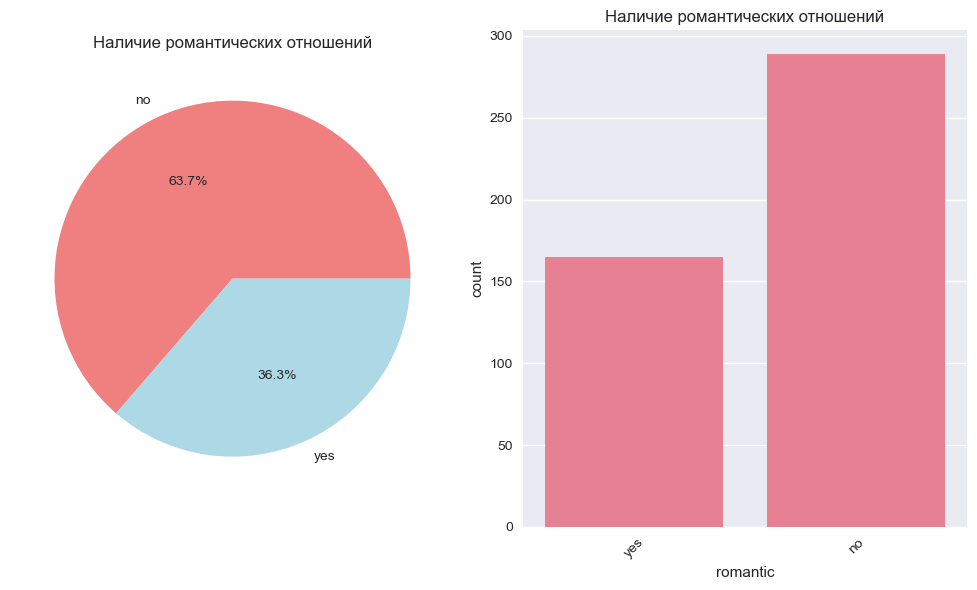

In [573]:
plt.figure(figsize=(15, 6))

X_train_sex_cat = X_train.copy()
X_train_sex_cat['sex_category'] = X_train_sex_cat['sex'].apply(categorize_sex)

# Круговая диаграмма
plt.subplot(1, 3, 1)
romantic_counts = X_train['romantic'].value_counts()
plt.pie(romantic_counts.values, labels=romantic_counts.index, autopct='%1.1f%%', 
        colors=['lightcoral', 'lightblue'])
plt.title('Наличие романтических отношений')

# Bar plot
plt.subplot(1, 3, 2)
sns.countplot(data=X_train, x='romantic')
plt.title('Наличие романтических отношений')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Характеристика: "Alcohol Consumption"

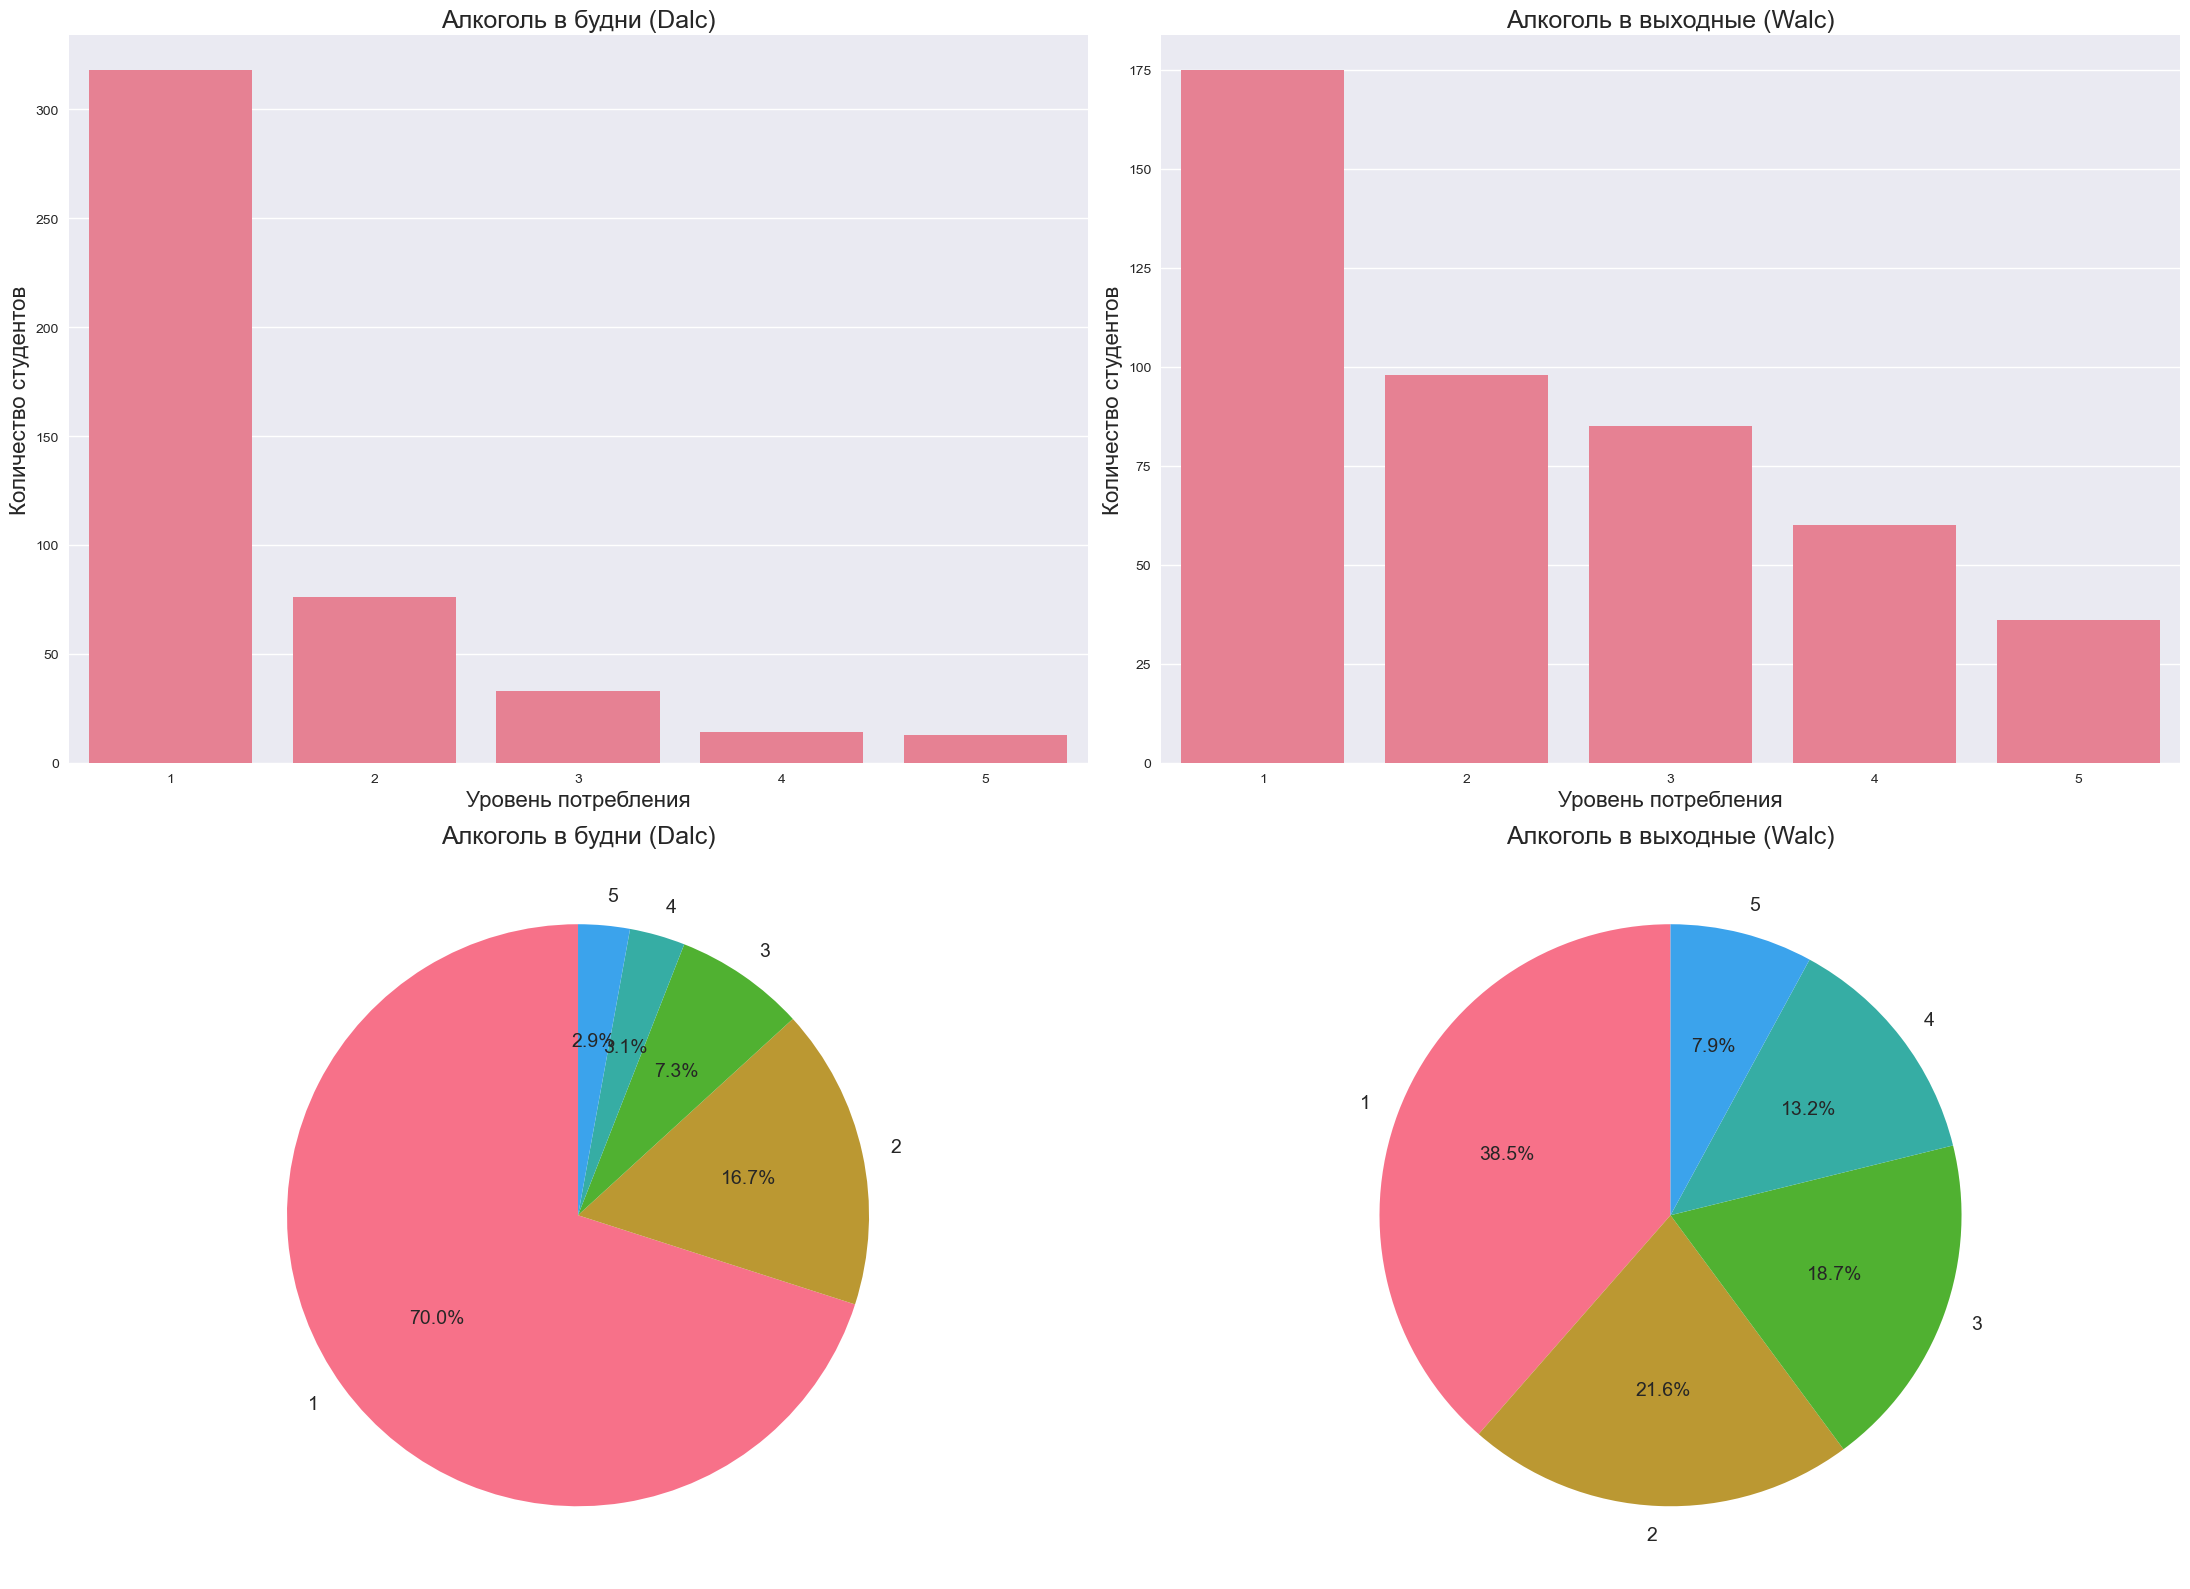

In [576]:
fig = plt.figure(figsize=(22, 16))

# Распределение weekday alcohol consumption
plt.subplot(2, 2, 1)
sns.countplot(data=X_train, x='Dalc')
plt.title('Алкоголь в будни (Dalc)', fontsize=18)
plt.xlabel('Уровень потребления', fontsize=16)
plt.ylabel('Количество студентов', fontsize=16)

# Распределение weekend alcohol consumption
plt.subplot(2, 2, 2)
sns.countplot(data=X_train, x='Walc')
plt.title('Алкоголь в выходные (Walc)', fontsize=18)
plt.xlabel('Уровень потребления', fontsize=16)
plt.ylabel('Количество студентов', fontsize=16)

# Круговая диаграмма для алкоголя в будни (Dalc)
plt.subplot(2, 2, 3)
dalc_counts = X_train['Dalc'].value_counts().sort_index()
plt.pie(dalc_counts.values, labels=dalc_counts.index, autopct='%1.1f%%', startangle=90,
        textprops={'fontsize': 14})
plt.title('Алкоголь в будни (Dalc)', fontsize=18)

# Круговая диаграмма для алкоголя в выходные (Walc)
plt.subplot(2, 2, 4)
walc_counts = X_train['Walc'].value_counts().sort_index()
plt.pie(walc_counts.values, labels=walc_counts.index, autopct='%1.1f%%', startangle=90,
        textprops={'fontsize': 14})
plt.title('Алкоголь в выходные (Walc)', fontsize=18)

plt.tight_layout()
plt.show()

## Целевая зависимость: "G3" (Final Grade)

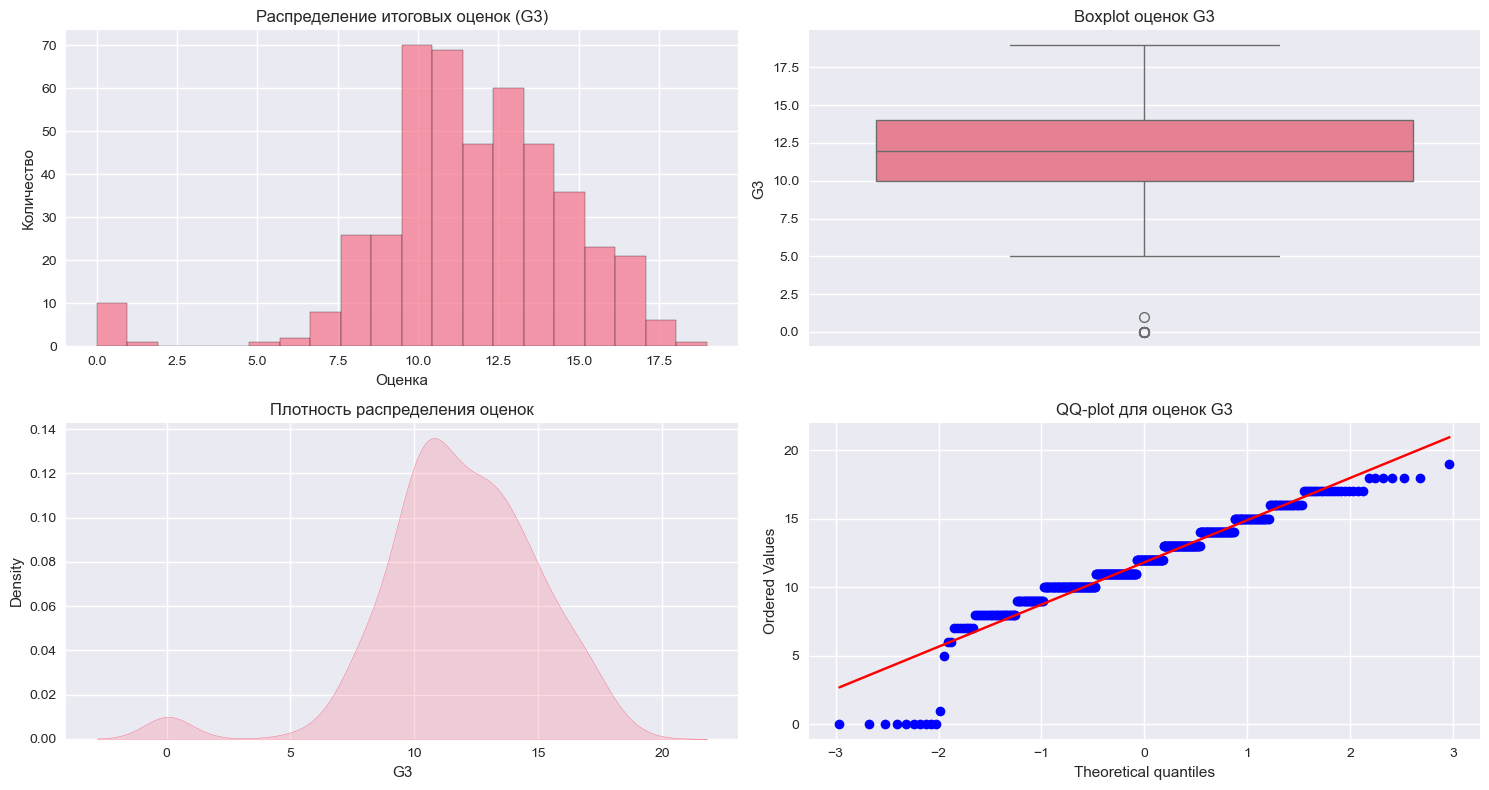

In [579]:
plt.figure(figsize=(15, 8))

# Гистограмма
plt.subplot(2, 2, 1)
X_train['G3'].hist(bins=20, edgecolor='black', alpha=0.7)
plt.title('Распределение итоговых оценок (G3)')
plt.xlabel('Оценка')
plt.ylabel('Количество')

# Boxplot
plt.subplot(2, 2, 2)
sns.boxplot(data=X_train, y='G3')
plt.title('Boxplot оценок G3')

# Плотность распределения
plt.subplot(2, 2, 3)
sns.kdeplot(data=X_train, x='G3', fill=True)
plt.title('Плотность распределения оценок')

# QQ-plot для проверки нормальности
plt.subplot(2, 2, 4)
stats.probplot(X_train['G3'].dropna(), dist="norm", plot=plt)
plt.title('QQ-plot для оценок G3')

plt.tight_layout()
plt.show()

## Прочие характеристики

Прочитайте описание данных на [сайте](https://www.kaggle.com/uciml/student-alcohol-consumption) и подумайте, какие еще характеристики было бы полезно проанализировать. Постройте соответсвующие графики для выбранных характеристик.

Постройте графики еще для минимум 4 характеристик: числовая (2) и категориальная (2), применив хотя бы один раз:
- pieplot
- boxplot
- violinplot

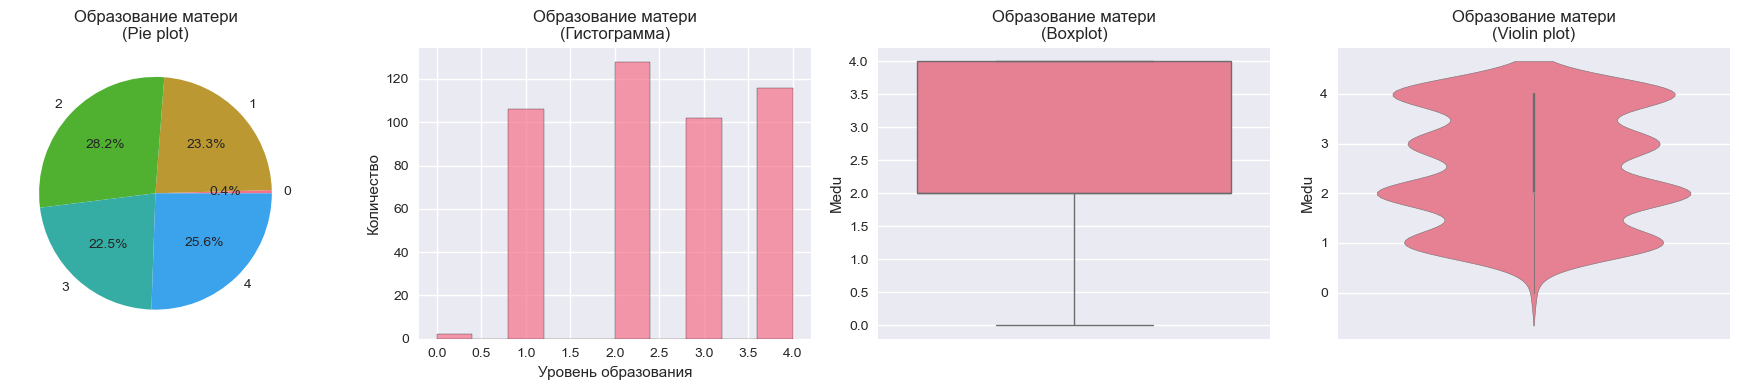

In [582]:
# Medu
plt.figure(figsize=(18, 4))

# Pie plot
plt.subplot(1, 4, 1)
medu_counts = X_train['Medu'].value_counts().sort_index()
plt.pie(medu_counts.values, labels=medu_counts.index, autopct='%1.1f%%')
plt.title('Образование матери\n(Pie plot)')

# Гистограмма
plt.subplot(1, 4, 2)
X_train['Medu'].hist(bins=10, edgecolor='black', alpha=0.7)
plt.title('Образование матери\n(Гистограмма)')
plt.xlabel('Уровень образования')
plt.ylabel('Количество')

# Boxplot
plt.subplot(1, 4, 3)
sns.boxplot(data=X_train, y='Medu')
plt.title('Образование матери\n(Boxplot)')

# Violin plot
plt.subplot(1, 4, 4)
sns.violinplot(data=X_train, y='Medu')
plt.title('Образование матери\n(Violin plot)')

plt.tight_layout()
plt.show()

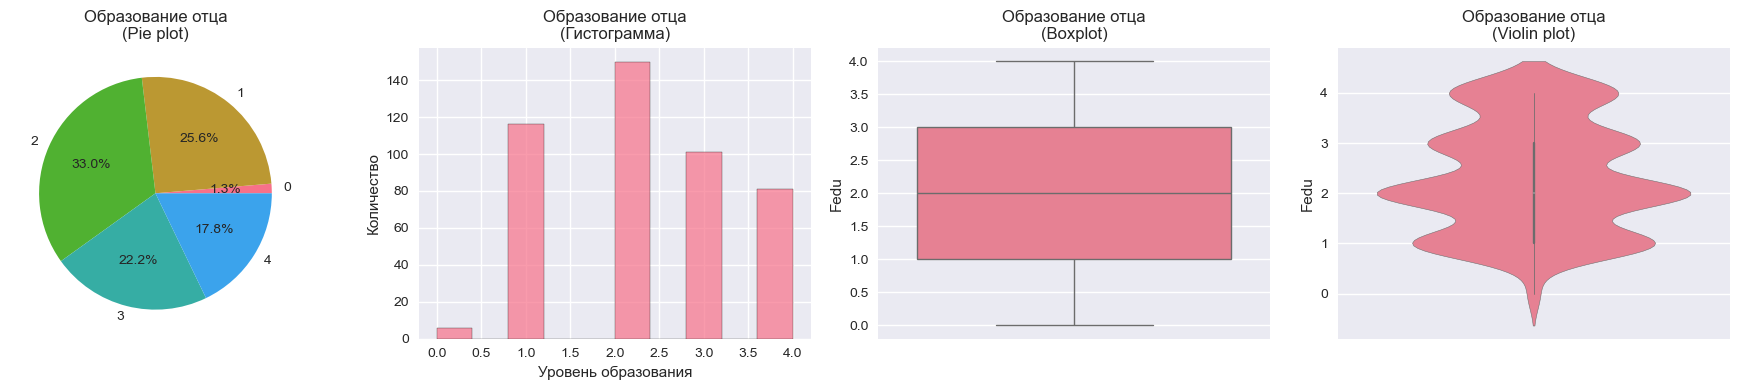

In [584]:
# Fedu
plt.figure(figsize=(18, 4))

# Pie plot
plt.subplot(1, 4, 1)
fedu_counts = X_train['Fedu'].value_counts().sort_index()
plt.pie(fedu_counts.values, labels=fedu_counts.index, autopct='%1.1f%%')
plt.title('Образование отца\n(Pie plot)')

# Гистограмма
plt.subplot(1, 4, 2)
X_train['Fedu'].hist(bins=10, edgecolor='black', alpha=0.7)
plt.title('Образование отца\n(Гистограмма)')
plt.xlabel('Уровень образования')
plt.ylabel('Количество')

# Boxplot
plt.subplot(1, 4, 3)
sns.boxplot(data=X_train, y='Fedu')
plt.title('Образование отца\n(Boxplot)')

# Violin plot
plt.subplot(1, 4, 4)
sns.violinplot(data=X_train, y='Fedu')
plt.title('Образование отца\n(Violin plot)')

plt.tight_layout()
plt.show()

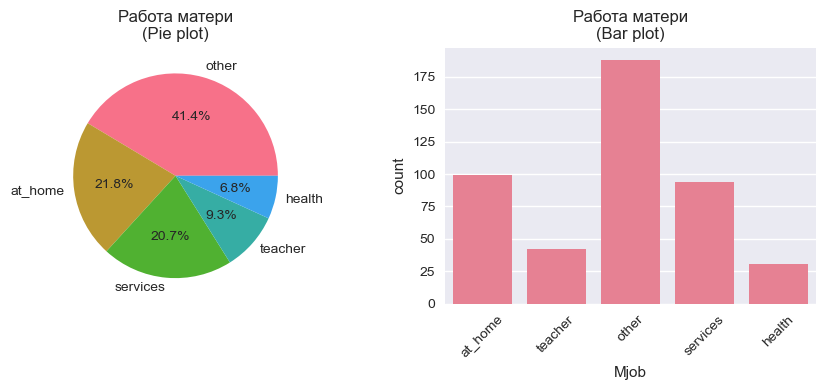

In [586]:
# Характеристика Mjob (работа матери)
plt.figure(figsize=(18, 4))

# Pie plot
plt.subplot(1, 4, 1)
mjob_counts = X_train['Mjob'].value_counts()
plt.pie(mjob_counts.values, labels=mjob_counts.index, autopct='%1.1f%%')
plt.title('Работа матери\n(Pie plot)')

# Bar plot
plt.subplot(1, 4, 2)
sns.countplot(data=X_train, x='Mjob')
plt.title('Работа матери\n(Bar plot)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

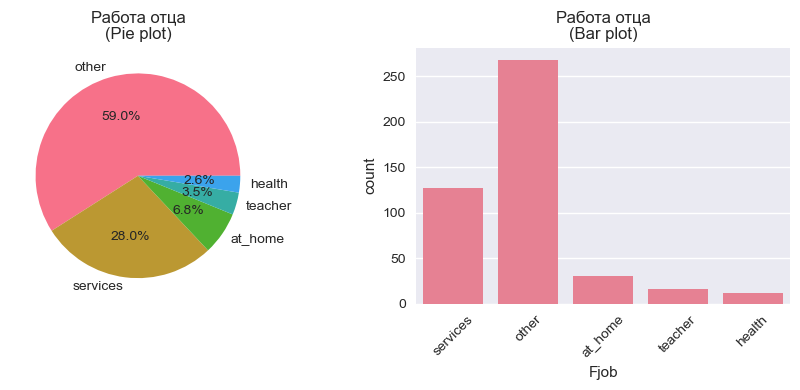

In [588]:
# Характеристика Fjob (работа отца)
plt.figure(figsize=(18, 4))

# Pie plot
plt.subplot(1, 4, 1)
fjob_counts = X_train['Fjob'].value_counts()
plt.pie(fjob_counts.values, labels=fjob_counts.index, autopct='%1.1f%%')
plt.title('Работа отца\n(Pie plot)')

# Bar plot
plt.subplot(1, 4, 2)
sns.countplot(data=X_train, x='Fjob')
plt.title('Работа отца\n(Bar plot)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

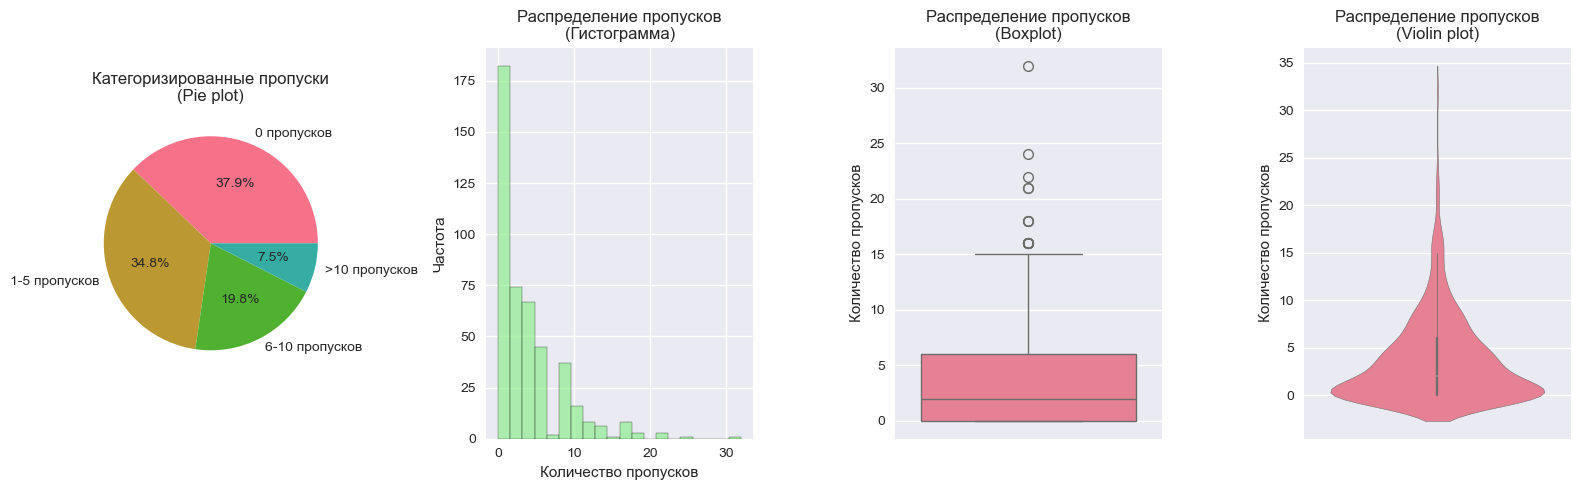

In [590]:
# Характеристика Absences (пропуски)
plt.figure(figsize=(20, 5))

# Pie plot
plt.subplot(1, 5, 1)
# Категории для пропусков
def categorize_absences(value):
    if value == 0:
        return '0 пропусков'
    elif 1 <= value <= 5:
        return '1-5 пропусков'
    elif 6 <= value <= 10:
        return '6-10 пропусков'
    else:
        return '>10 пропусков'

absences_categorized = X_train['absences'].apply(categorize_absences)
absences_counts = absences_categorized.value_counts()
plt.pie(absences_counts.values, labels=absences_counts.index, autopct='%1.1f%%')
plt.title('Категоризированные пропуски\n(Pie plot)')

# Гистограмма
plt.subplot(1, 5, 2)
X_train['absences'].hist(bins=20, edgecolor='black', alpha=0.7, color='lightgreen')
plt.title('Распределение пропусков\n(Гистограмма)')
plt.xlabel('Количество пропусков')
plt.ylabel('Частота')

# Boxplot
plt.subplot(1, 5, 3)
sns.boxplot(data=X_train, y='absences')
plt.title('Распределение пропусков\n(Boxplot)')
plt.ylabel('Количество пропусков')

# Violin plot
plt.subplot(1, 5, 4)
sns.violinplot(data=X_train, y='absences')
plt.title('Распределение пропусков\n(Violin plot)')
plt.ylabel('Количество пропусков')

plt.tight_layout()
plt.show()

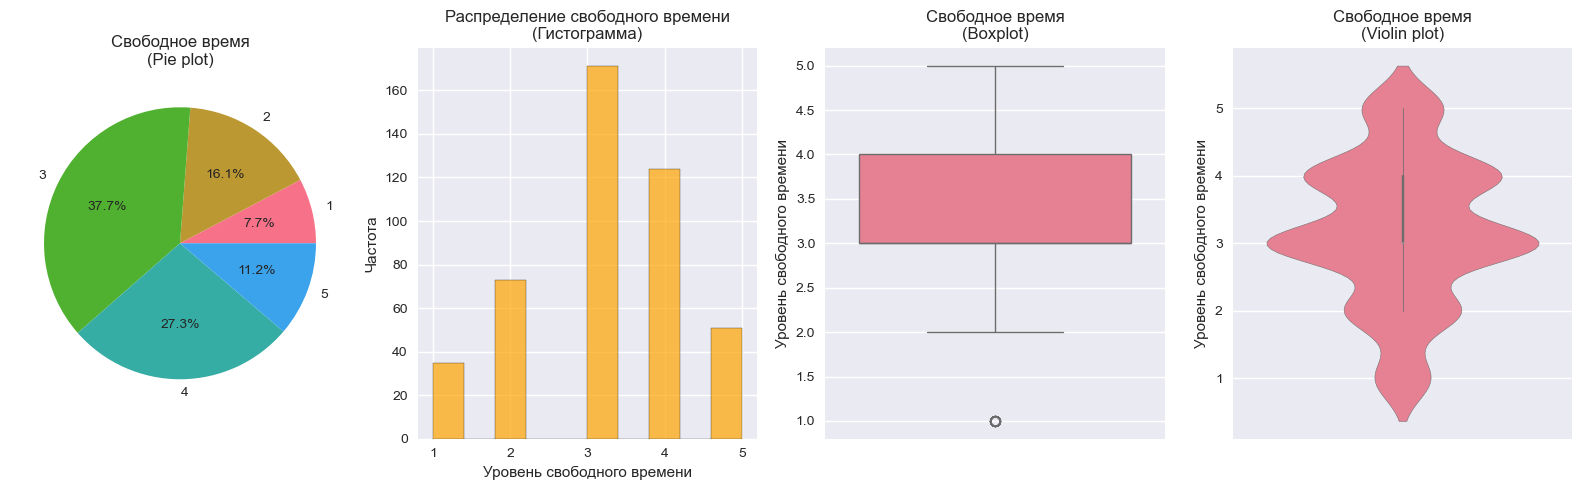

In [592]:
# Характеристика Freetime (свободное время)
plt.figure(figsize=(20, 5))

# Pie plot
plt.subplot(1, 5, 1)
freetime_counts = X_train['freetime'].value_counts().sort_index()
plt.pie(freetime_counts.values, labels=freetime_counts.index, autopct='%1.1f%%')
plt.title('Свободное время\n(Pie plot)')

# Гистограмма
plt.subplot(1, 5, 2)
X_train['freetime'].hist(bins=10, edgecolor='black', alpha=0.7, color='orange')
plt.title('Распределение свободного времени\n(Гистограмма)')
plt.xlabel('Уровень свободного времени')
plt.ylabel('Частота')

# Boxplot
plt.subplot(1, 5, 3)
sns.boxplot(data=X_train, y='freetime')
plt.title('Свободное время\n(Boxplot)')
plt.ylabel('Уровень свободного времени')

# Violin plot
plt.subplot(1, 5, 4)
sns.violinplot(data=X_train, y='freetime')
plt.title('Свободное время\n(Violin plot)')
plt.ylabel('Уровень свободного времени')
plt.tight_layout()
plt.show()

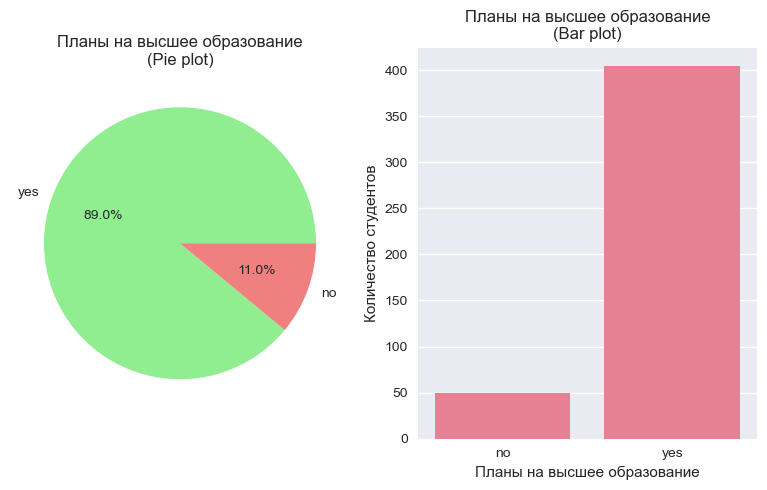

In [594]:
# Характеристика Higher (планы на высшее образование)
plt.figure(figsize=(20, 5))

# Pie plot
plt.subplot(1, 5, 1)
higher_counts = X_train['higher'].value_counts()
plt.pie(higher_counts.values, labels=higher_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Планы на высшее образование\n(Pie plot)')

# Bar plot
plt.subplot(1, 5, 2)
sns.countplot(data=X_train, x='higher')
plt.title('Планы на высшее образование\n(Bar plot)')
plt.xlabel('Планы на высшее образование')
plt.ylabel('Количество студентов')

plt.tight_layout()
plt.show()

## Корреляция признаков

Для того, чтобы быстро получить оценку о взаимосвязи признаков целесообразно построить матрицу их корреляции. Постройте матрицу корреляции.

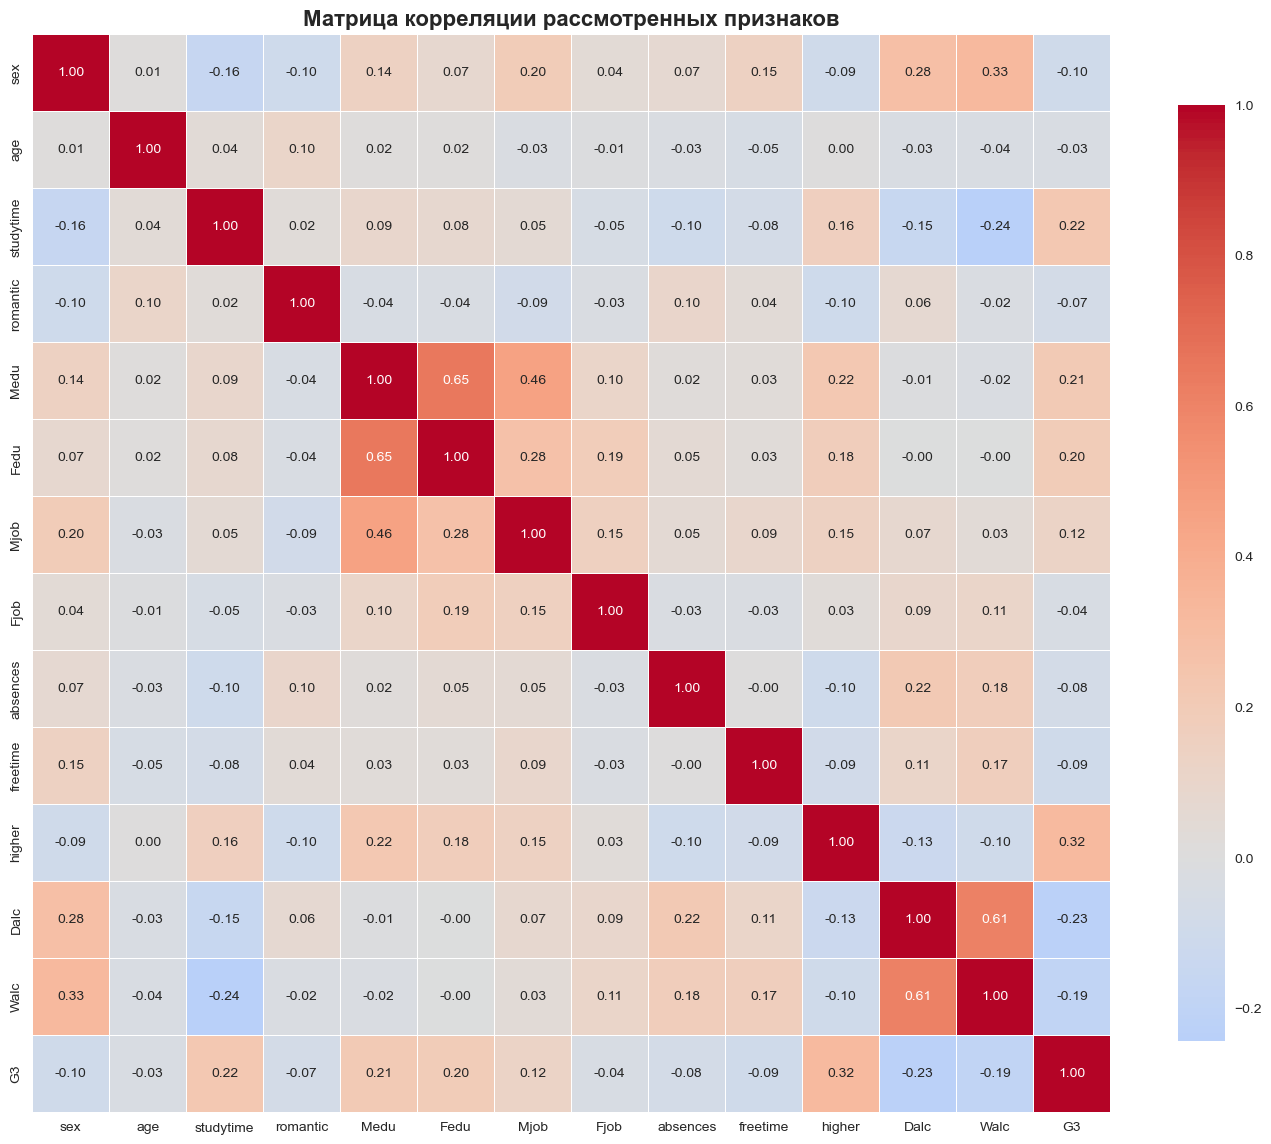

In [597]:
considered_features = ['sex', 'age', 'studytime', 'romantic', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'absences', 'freetime', 'higher', 'Dalc', 'Walc', 'G3']

correlation_data = X_train[considered_features].copy()
# correlation_data['total_alc'] = correlation_data['Dalc'] + correlation_data['Walc']
correlation_data['sex'] = correlation_data['sex'].apply(categorize_sex)
encoded_data = correlation_data.copy()

non_numeric_columns = encoded_data.select_dtypes(exclude=[np.number]).columns

label_encoders = {}
categorical_columns = ['sex', 'Mjob', 'Fjob', 'romantic', 'higher']

for col in categorical_columns:
    mask = encoded_data[col].notna()
    le = LabelEncoder()
    encoded_data.loc[mask, col] = le.fit_transform(encoded_data.loc[mask, col].astype(str))
    label_encoders[col] = le

plt.figure(figsize=(14, 12))
correlation_matrix = encoded_data.corr()

sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True, 
            fmt='.2f',
            cbar_kws={"shrink": .8},
            linewidths=0.5)

plt.title('Матрица корреляции рассмотренных признаков', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## Посчитайте корреляцию Спирмана и нарисуйте ее в виде тепловой карты

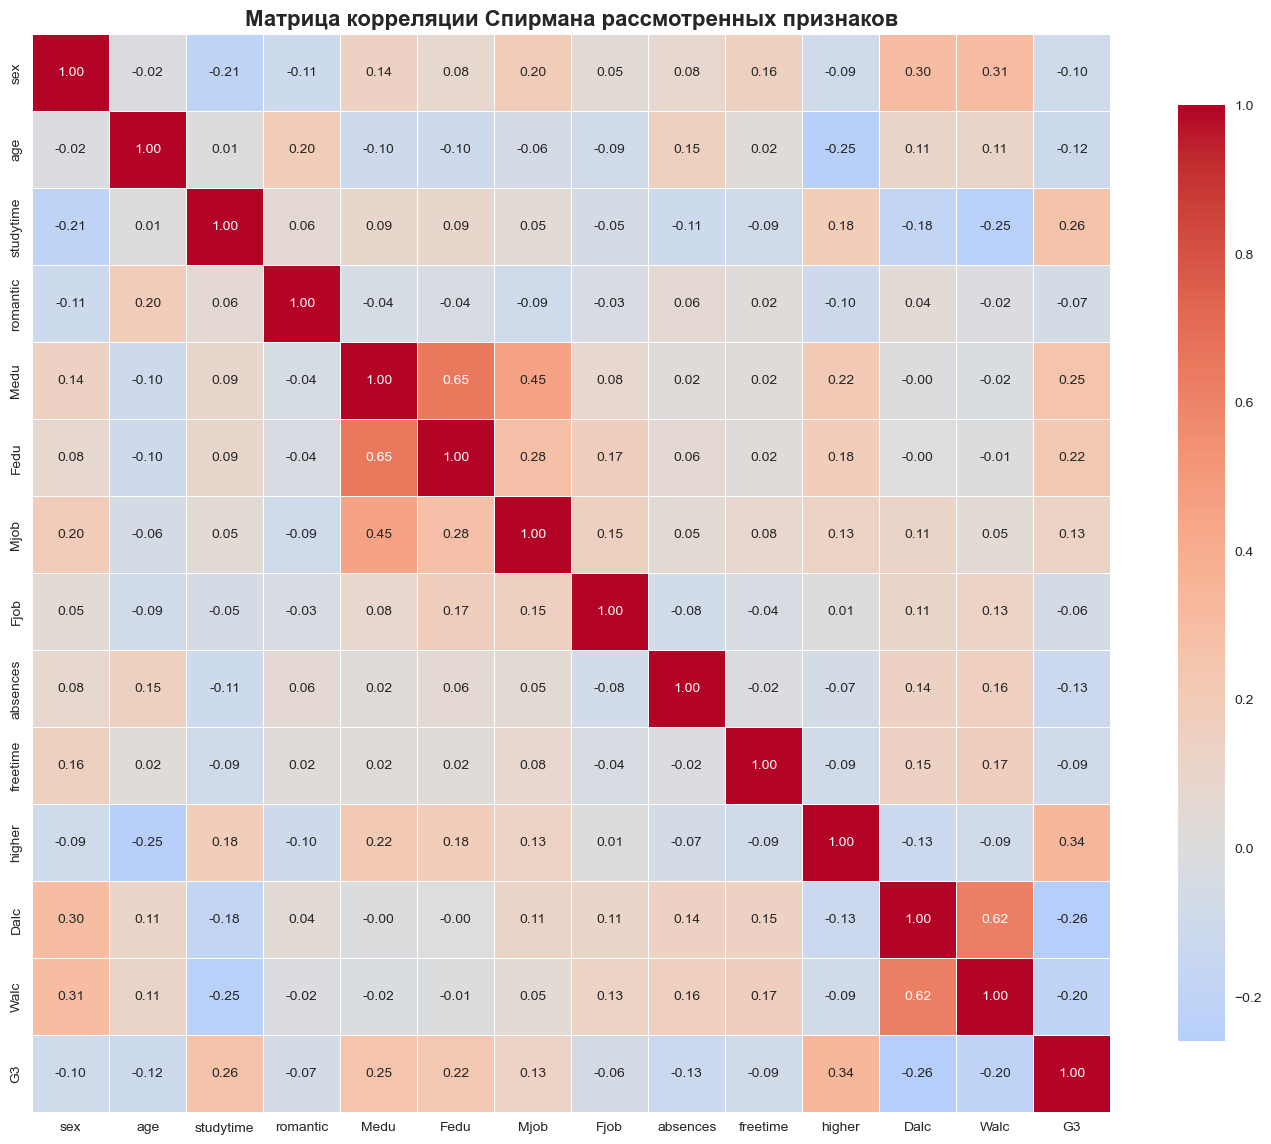

In [600]:
plt.figure(figsize=(14, 12))
spearman_corr = encoded_data.corr(method='spearman')

sns.heatmap(spearman_corr, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True, 
            fmt='.2f',
            cbar_kws={"shrink": .8},
            linewidths=0.5)

plt.title('Матрица корреляции Спирмана рассмотренных признаков', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## Диапазон значений характеристик

Посчитайте число уникальных значений для каждого признака и сравните их между собой.

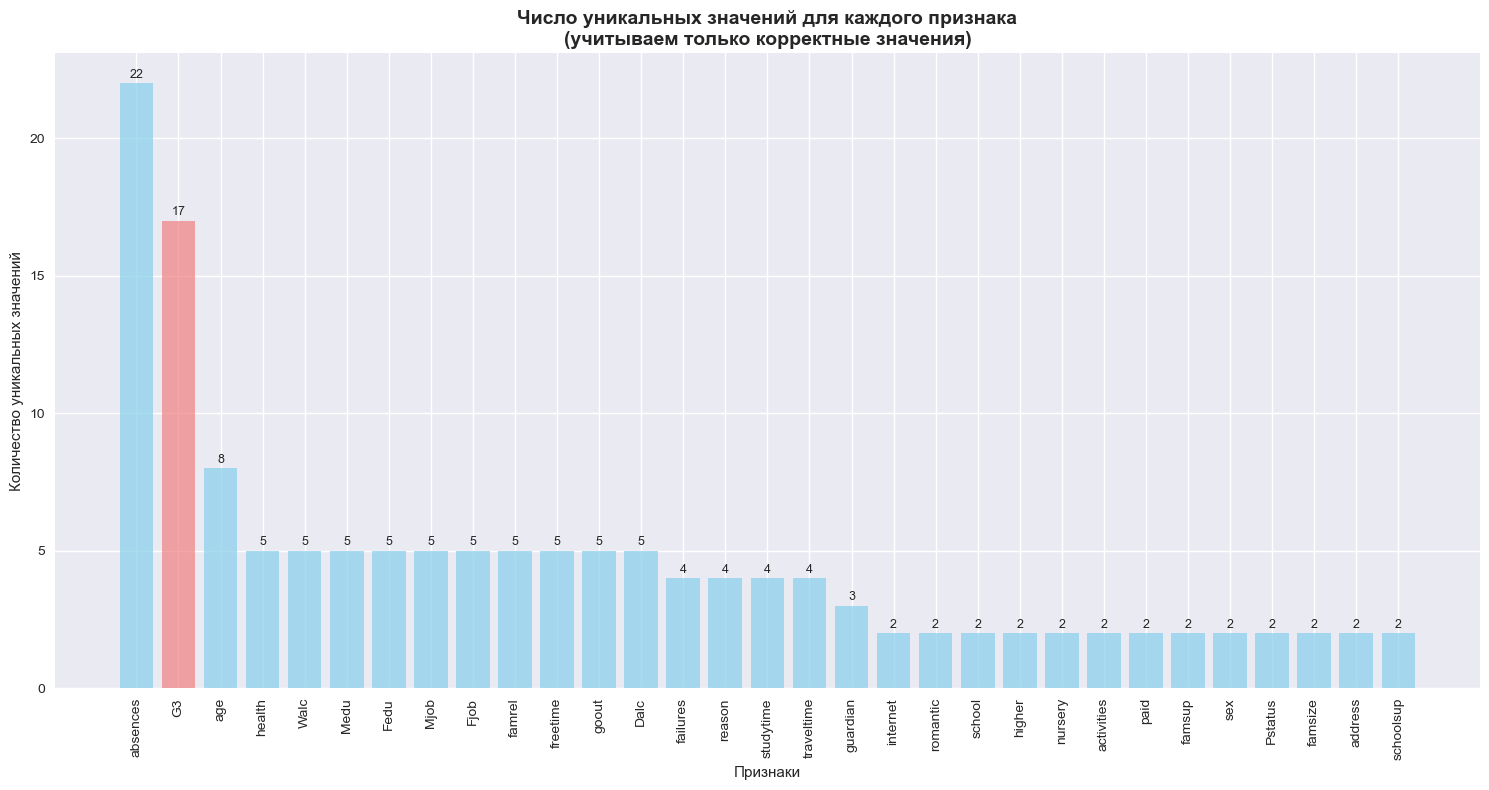

In [603]:
filtered_data = X_train.copy()

filtered_data = filtered_data[(filtered_data['age'] >= 15) & (filtered_data['age'] <= 22)]

filtered_data['sex'] = filtered_data['sex'].apply(categorize_sex)
filtered_data = filtered_data[filtered_data['sex'].isin(['M', 'F'])]

unique_counts = {}
for column in filtered_data.columns:
    unique_counts[column] = filtered_data[column].nunique()

unique_df = pd.DataFrame.from_dict(unique_counts, orient='index', columns=['Уникальные значения'])
unique_df = unique_df.sort_values('Уникальные значения', ascending=False)

plt.figure(figsize=(15, 8))
colors = ['skyblue' if x != 'G3' else 'lightcoral' for x in unique_df.index]

bars = plt.bar(range(len(unique_df)), unique_df['Уникальные значения'], color=colors, alpha=0.7)
plt.title('Число уникальных значений для каждого признака\n(учитываем только корректные значения)', fontsize=14, fontweight='bold')
plt.xlabel('Признаки')
plt.ylabel('Количество уникальных значений')
plt.xticks(range(len(unique_df)), unique_df.index, rotation=90)

for bar, count in zip(bars, unique_df['Уникальные значения']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             str(count), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [605]:
# Анализ типов признаков
print(f"\nРАСПРЕДЕЛЕНИЕ ПО ТИПАМ ПРИЗНАКОВ:")
numeric_low = unique_df[unique_df['Уникальные значения'] <= 3].index.tolist()
numeric_high = unique_df[(unique_df['Уникальные значения'] > 3) & (unique_df.index != 'G3')].index.tolist()

print(f"Категориальные/дискретные признаки (≤3 уникальных значений): {len(numeric_low)}")
print(f"Числовые непрерывные признаки (>3 уникальных значений): {len(numeric_high)}")
print(f"Целевая переменная (G3): 1")

print(f"\nКатегориальные/дискретные признаки:")
for feature in numeric_low:
    print(f"  - {feature}: {unique_df.loc[feature, 'Уникальные значения']} значений")

print(f"\nЧисловые непрерывные признаки:")
for feature in numeric_high:
    print(f"  - {feature}: {unique_df.loc[feature, 'Уникальные значения']} значений")


РАСПРЕДЕЛЕНИЕ ПО ТИПАМ ПРИЗНАКОВ:
Категориальные/дискретные признаки (≤3 уникальных значений): 14
Числовые непрерывные признаки (>3 уникальных значений): 16
Целевая переменная (G3): 1

Категориальные/дискретные признаки:
  - guardian: 3 значений
  - internet: 2 значений
  - romantic: 2 значений
  - school: 2 значений
  - higher: 2 значений
  - nursery: 2 значений
  - activities: 2 значений
  - paid: 2 значений
  - famsup: 2 значений
  - sex: 2 значений
  - Pstatus: 2 значений
  - famsize: 2 значений
  - address: 2 значений
  - schoolsup: 2 значений

Числовые непрерывные признаки:
  - absences: 22 значений
  - age: 8 значений
  - health: 5 значений
  - Walc: 5 значений
  - Medu: 5 значений
  - Fedu: 5 значений
  - Mjob: 5 значений
  - Fjob: 5 значений
  - famrel: 5 значений
  - freetime: 5 значений
  - goout: 5 значений
  - Dalc: 5 значений
  - failures: 4 значений
  - reason: 4 значений
  - studytime: 4 значений
  - traveltime: 4 значений


## Найдите соотношение мужского и женского пола для самых выскоих оценок (G3) из датасета, у которых время на дорогу больше, чем 30 минут. Нарисуйте это соотношение на круговой диаграмме

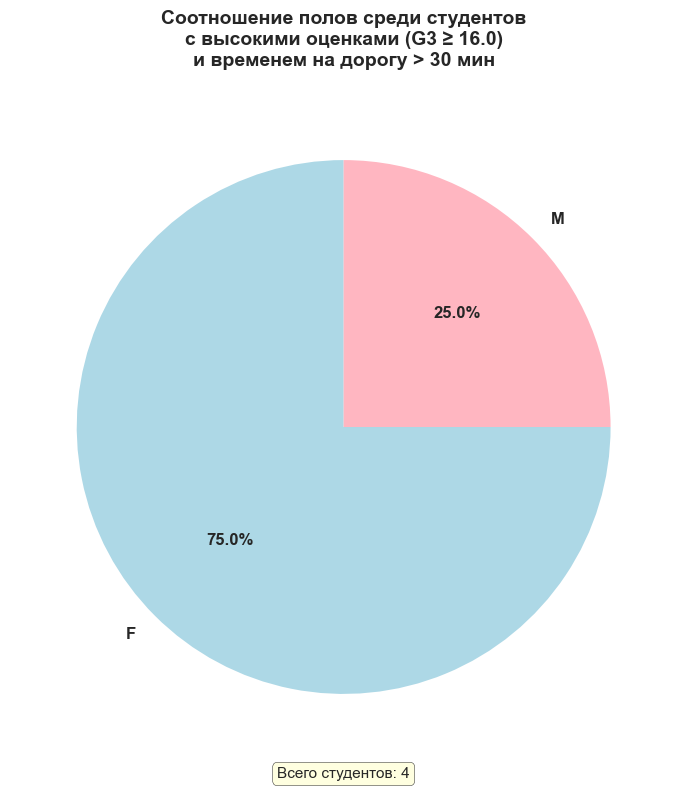

In [608]:
high_scores_threshold = X_train['G3'].quantile(0.9)

filtered_data = X_train[
    (X_train['G3'] >= high_scores_threshold) & 
    (X_train['traveltime'] >= 3)
]

if len(filtered_data) > 0:
    filtered_data_sex = filtered_data['sex'].apply(categorize_sex)

    sex_counts = filtered_data_sex.value_counts()
    
    # Круговая диаграмма
    plt.figure(figsize=(10, 8))
    colors = ['lightblue', 'lightpink', 'lightgray']
    
    plt.pie(sex_counts.values, 
            labels=sex_counts.index, 
            autopct='%1.1f%%', 
            colors=colors[:len(sex_counts)],
            startangle=90,
            textprops={'fontsize': 12, 'fontweight': 'bold'})
    
    plt.title(f'Соотношение полов среди студентов\nс высокими оценками (G3 ≥ {high_scores_threshold})\nи временем на дорогу > 30 мин', 
              fontsize=14, fontweight='bold', pad=20)

    total_students = len(filtered_data)
    plt.text(0, -1.3, f'Всего студентов: {total_students}', 
             ha='center', va='center', fontsize=11, 
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow"))
    
    plt.tight_layout()
    plt.show()  
else:
    print("Нет студентов, удовлетворяющих условиям")
    print(f"\nРаспределение оценок G3:")
    print(X_train['G3'].describe())
    print(f"\nРаспределение времени на дорогу:")
    print(X_train['traveltime'].value_counts().sort_index())

## Построить boxplot для оценок по возрасту.  

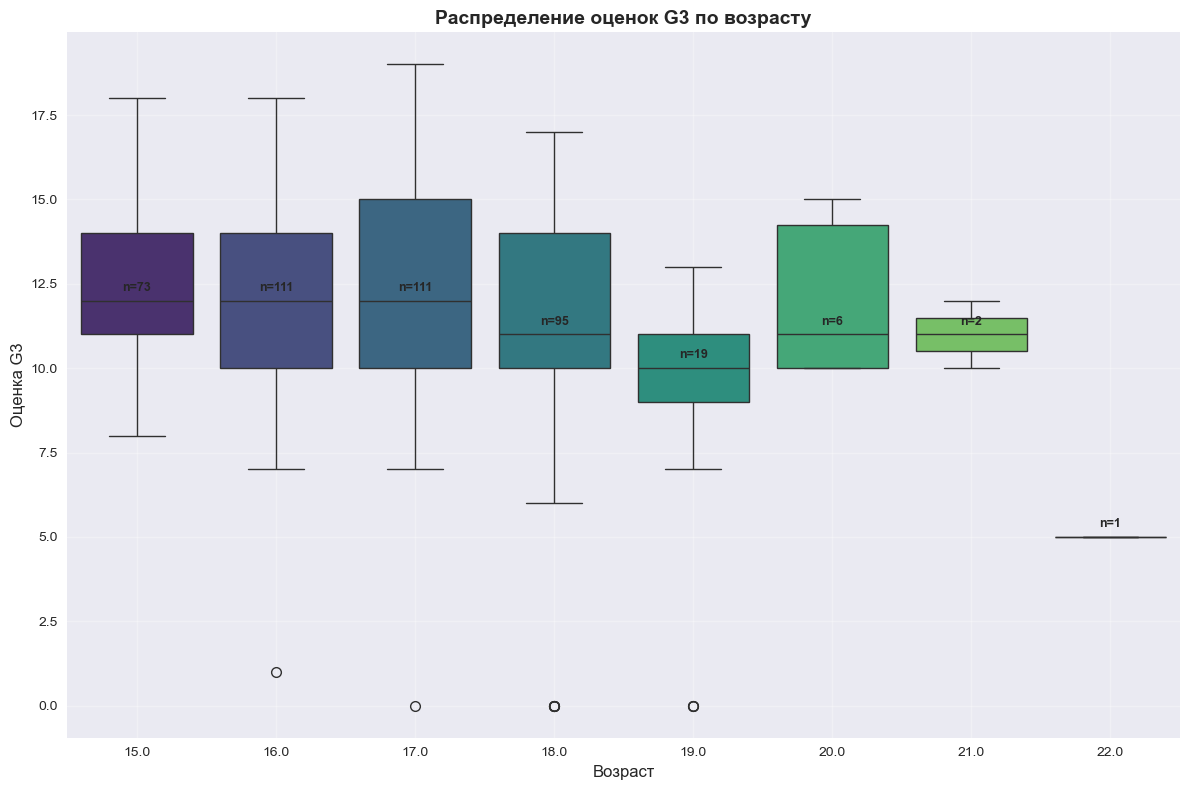

In [611]:
age_filtered = X_train[(X_train['age'] >= 15) & (X_train['age'] <= 22)]

plt.figure(figsize=(12, 8))

sns.boxplot(data=age_filtered, x='age', y='G3', palette='viridis')

plt.title('Распределение оценок G3 по возрасту', fontsize=14, fontweight='bold')
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Оценка G3', fontsize=12)
plt.grid(True, alpha=0.3)

ages = sorted(age_filtered['age'].unique())
for i, age in enumerate(ages):
    age_data = age_filtered[age_filtered['age'] == age]['G3']
    median_grade = age_data.median()
    count = len(age_data)
    plt.text(i, median_grade + 0.2, f'n={count}', 
             ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

## Найти id топ-5 самых юных отличников.

ТОП-5 САМЫХ ЮНЫХ ОТЛИЧНИКОВ:
1. ID: 109
   Возраст: 15.0
   Оценка G3: 18
   Пол: M

2. ID: 197
   Возраст: 15.0
   Оценка G3: 17
   Пол: M

3. ID: 32
   Возраст: 16.0
   Оценка G3: 17
   Пол: F

4. ID: 151
   Возраст: 16.0
   Оценка G3: 18
   Пол: F

5. ID: 251
   Возраст: 16.0
   Оценка G3: 17
   Пол: F



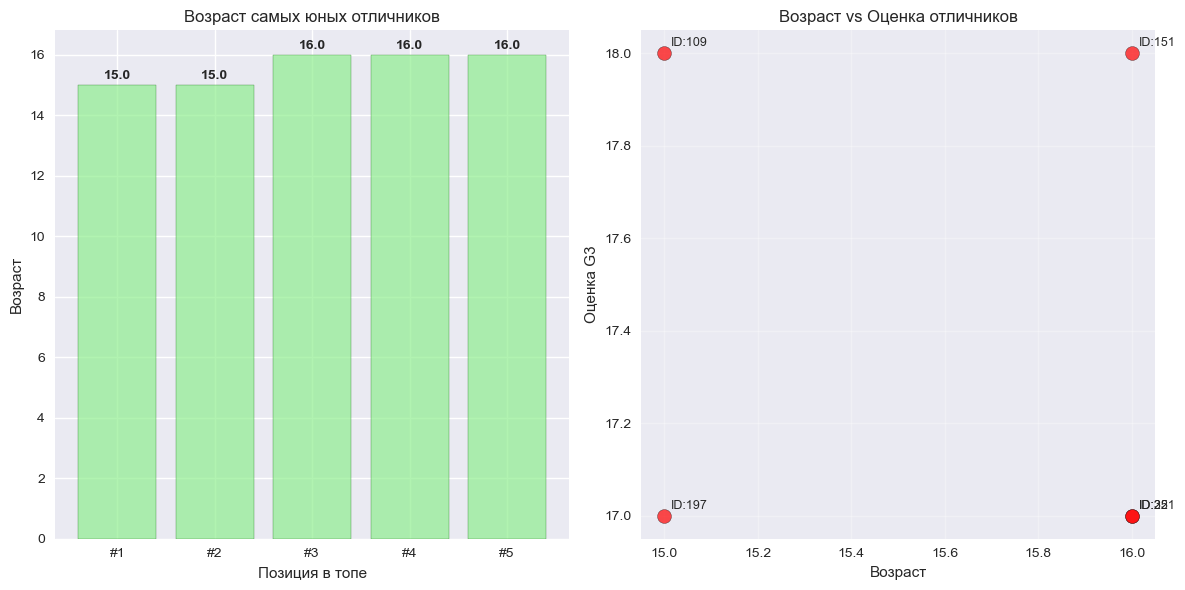

In [614]:
correct_age_data = X_train[(X_train['age'] >= 15) & (X_train['age'] <= 22)]
excellent_students = correct_age_data[correct_age_data['G3'] >= 17]

if len(excellent_students) > 0:
    top_young_excellent = excellent_students.nsmallest(5, 'age')
    
    print("ТОП-5 САМЫХ ЮНЫХ ОТЛИЧНИКОВ:")
    
    for i, (idx, row) in enumerate(top_young_excellent.iterrows(), 1):
        print(f"{i}. ID: {idx}")
        print(f"   Возраст: {row['age']}")
        print(f"   Оценка G3: {row['G3']}")
        print(f"   Пол: {row['sex']}")
        print()

    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    # Bar plot возраста отличников
    plt.bar(range(len(top_young_excellent)), top_young_excellent['age'], 
            color='lightgreen', edgecolor='darkgreen', alpha=0.7)
    plt.title('Возраст самых юных отличников')
    plt.xlabel('Позиция в топе')
    plt.ylabel('Возраст')
    plt.xticks(range(len(top_young_excellent)), [f'#{i+1}' for i in range(len(top_young_excellent))])

    for i, age in enumerate(top_young_excellent['age']):
        plt.text(i, age + 0.1, f'{age}', ha='center', va='bottom', fontweight='bold')
    
    plt.subplot(1, 2, 2)
    # Scatter plot возраст vs оценка
    plt.scatter(top_young_excellent['age'], top_young_excellent['G3'], 
                s=100, color='red', alpha=0.7, edgecolors='black')
    plt.title('Возраст vs Оценка отличников')
    plt.xlabel('Возраст')
    plt.ylabel('Оценка G3')
    plt.grid(True, alpha=0.3)

    for idx, row in top_young_excellent.iterrows():
        plt.annotate(f'ID:{idx}', (row['age'], row['G3']), 
                    xytext=(5, 5), textcoords='offset points', fontsize=9)
    
    plt.tight_layout()
    plt.show()
else:
    print("Отличников (G3 >= 17) не найдено")
    print(f"Максимальная оценка в датасете: {X_train['G3'].max()}")

## Для каждого возраста найдите максимальную и минимальную оценку (G3)

МАКСИМАЛЬНЫЕ И МИНИМАЛЬНЫЕ ОЦЕНКИ ПО ВОЗРАСТУ (15-22 года):
 age  Максимальная оценка  Минимальная оценка  Средняя оценка
15.0                   18                   8       12.287671
16.0                   18                   1       12.072072
17.0                   19                   0       12.306306
18.0                   17                   0       11.326316
19.0                   13                   0        8.631579
20.0                   15                  10       12.000000
21.0                   12                  10       11.000000
22.0                    5                   5        5.000000


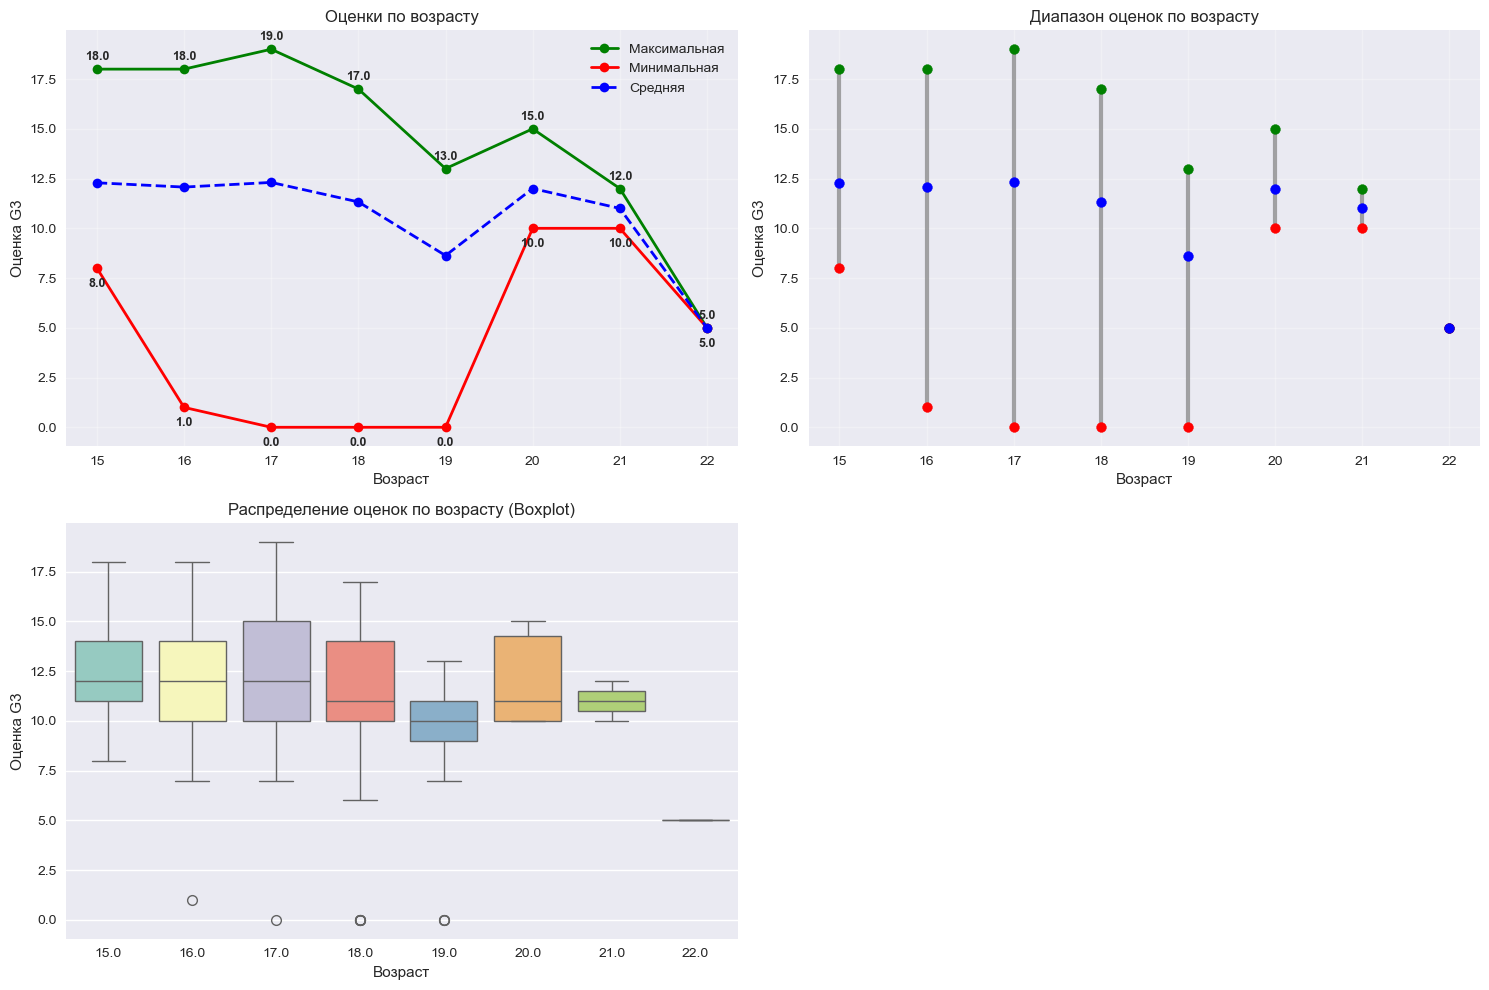

In [617]:
correct_age_data = X_train[(X_train['age'] >= 15) & (X_train['age'] <= 22)]

age_grades_stats = correct_age_data.groupby('age')['G3'].agg(['max', 'min', 'mean']).reset_index()
age_grades_stats = age_grades_stats.rename(columns={
    'max': 'Максимальная оценка',
    'min': 'Минимальная оценка',
    'mean': 'Средняя оценка'
})

print("МАКСИМАЛЬНЫЕ И МИНИМАЛЬНЫЕ ОЦЕНКИ ПО ВОЗРАСТУ (15-22 года):")
print(age_grades_stats.to_string(index=False))

plt.figure(figsize=(15, 10))

# График 1: Максимальные и минимальные оценки
plt.subplot(2, 2, 1)
plt.plot(age_grades_stats['age'], age_grades_stats['Максимальная оценка'], 
         marker='o', linewidth=2, label='Максимальная', color='green')
plt.plot(age_grades_stats['age'], age_grades_stats['Минимальная оценка'], 
         marker='o', linewidth=2, label='Минимальная', color='red')
plt.plot(age_grades_stats['age'], age_grades_stats['Средняя оценка'], 
         marker='o', linewidth=2, label='Средняя', color='blue', linestyle='--')
plt.title('Оценки по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Оценка G3')
plt.legend()
plt.grid(True, alpha=0.3)

for i, row in age_grades_stats.iterrows():
    plt.text(row['age'], row['Максимальная оценка'] + 0.3, f"{row['Максимальная оценка']}", 
             ha='center', va='bottom', fontsize=9, fontweight='bold')
    plt.text(row['age'], row['Минимальная оценка'] - 0.5, f"{row['Минимальная оценка']}", 
             ha='center', va='top', fontsize=9, fontweight='bold')

# График 2: Range plot (диапазон оценок)
plt.subplot(2, 2, 2)
for i, row in age_grades_stats.iterrows():
    plt.plot([row['age'], row['age']], [row['Минимальная оценка'], row['Максимальная оценка']], 
             color='gray', linewidth=3, alpha=0.7)
    plt.scatter(row['age'], row['Максимальная оценка'], color='green', s=50, zorder=5)
    plt.scatter(row['age'], row['Минимальная оценка'], color='red', s=50, zorder=5)
    plt.scatter(row['age'], row['Средняя оценка'], color='blue', s=50, zorder=5)

plt.title('Диапазон оценок по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Оценка G3')
plt.grid(True, alpha=0.3)

# График 3: Boxplot для каждого возраста
plt.subplot(2, 2, 3)
sns.boxplot(data=correct_age_data, x='age', y='G3', palette='Set3')
plt.title('Распределение оценок по возрасту (Boxplot)')
plt.xlabel('Возраст')
plt.ylabel('Оценка G3')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# Часть 2. Предобработка данных

Теперь перейдем к подготовке данных для моделей машинного обучения. Не все из описанного ниже нужно делать. Подумайте.

## Найдите и исправьте ошибки в данных

In [622]:
print("ПРОВЕРКА БИНАРНЫХ И КАТЕГОРИАЛЬНЫХ ХАРАКТЕРИСТИК НА ПОСТОРОННИЕ ЗНАЧЕНИЯ")
print("=" * 70)

# Создаем словарь с ожидаемыми значениями для каждой характеристики
expected_values = {
    'sex': ['M', 'F'],
    'address': ['U', 'R'],
    'famsize': ['LE3', 'GT3'],
    'Pstatus': ['T', 'A'],
    'schoolsup': ['yes', 'no'],
    'famsup': ['yes', 'no'],
    'paid': ['yes', 'no'],
    'activities': ['yes', 'no'],
    'nursery': ['yes', 'no'],
    'higher': ['yes', 'no'],
    'internet': ['yes', 'no'],
    'romantic': ['yes', 'no']
}

X_train_fixed = X_train.copy()

print("ПРОВЕРКА КАТЕГОРИАЛЬНЫХ ХАРАКТЕРИСТИК:")
print("-" * 50)

for column, expected in expected_values.items():
    if column in X_train_fixed.columns:
        unique_values = X_train_fixed[column].unique()
        invalid_values = [val for val in unique_values if val not in expected and pd.notna(val)]
        
        print(f"\n{column}:")
        print(f"  Ожидаемые значения: {expected}")
        print(f"  Фактические уникальные значения: {list(unique_values)}")
        print(f"  Некорректные значения: {invalid_values if invalid_values else 'нет'}")
        
        if invalid_values:
            # Заменяем некорректные значения на NaN
            invalid_count = X_train_fixed[column].isin(invalid_values).sum()
            X_train_fixed.loc[X_train_fixed[column].isin(invalid_values), column] = np.nan
            print(f"  Заменено на NaN: {invalid_count} значений")
        else:
            print(f"  ✅ Все значения корректны")

# Проверка числовых характеристик с ограниченным диапазоном
print("\nПРОВЕРКА ЧИСЛОВЫХ ХАРАКТЕРИСТИК С ОГРАНИЧЕННЫМ ДИАПАЗОНОМ:")
print("-" * 60)

numeric_ranges = {
    'age': (15, 22),
    'Medu': (0, 4),
    'Fedu': (0, 4),
    'traveltime': (1, 4),
    'studytime': (1, 4),
    'failures': (0, 4),
    'famrel': (1, 5),
    'freetime': (1, 5),
    'goout': (1, 5),
    'Dalc': (1, 5),
    'Walc': (1, 5),
    'health': (1, 5),
    'absences': (0, 93)
}

for column, (min_val, max_val) in numeric_ranges.items():
    if column in X_train_fixed.columns:
        invalid_mask = (X_train_fixed[column] < min_val) | (X_train_fixed[column] > max_val)
        invalid_count = invalid_mask.sum()
        
        print(f"\n{column}:")
        print(f"  Допустимый диапазон: {min_val} - {max_val}")
        print(f"  Фактический диапазон: {X_train_fixed[column].min():.1f} - {X_train_fixed[column].max():.1f}")
        print(f"  Некорректные значения: {invalid_count}")
        
        if invalid_count > 0:
            invalid_values = X_train_fixed[invalid_mask][column].unique()
            print(f"  Конкретные некорректные значения: {sorted(invalid_values)}")
            
            X_train_fixed.loc[invalid_mask, column] = np.nan
            print(f"  Заменено на NaN: {invalid_count} значений")
        else:
            print(f"  ✅ Все значения в допустимом диапазоне")

# Проверка характеристик с работой
print("\nПРОВЕРКА ХАРАКТЕРИСТИК С РАБОТОЙ:")
print("-" * 40)

job_columns = ['Mjob', 'Fjob']
expected_jobs = ['teacher', 'health', 'services', 'at_home', 'other']

for column in job_columns:
    if column in X_train_fixed.columns:
        unique_values = X_train_fixed[column].unique()
        invalid_values = [val for val in unique_values if val not in expected_jobs and pd.notna(val)]
        
        print(f"\n{column}:")
        print(f"  Ожидаемые значения: {expected_jobs}")
        print(f"  Фактические уникальные значения: {list(unique_values)}")
        print(f"  Некорректные значения: {invalid_values if invalid_values else 'нет'}")
        
        if invalid_values:
            invalid_count = X_train_fixed[column].isin(invalid_values).sum()
            X_train_cleaned.loc[X_train_fixed[column].isin(invalid_values), column] = np.nan
            print(f"  Заменено на NaN: {invalid_count} значений")
        else:
            print(f"  ✅ Все значения корректны")

# Проверка характеристики reason
print("\nПРОВЕРКА ХАРАКТЕРИСТИКИ REASON:")
print("-" * 35)

if 'reason' in X_train_fixed.columns:
    expected_reasons = ['home', 'reputation', 'course', 'other']
    unique_values = X_train_fixed['reason'].unique()
    invalid_values = [val for val in unique_values if val not in expected_reasons and pd.notna(val)]
    
    print(f"reason:")
    print(f"  Ожидаемые значения: {expected_reasons}")
    print(f"  Фактические уникальные значения: {list(unique_values)}")
    print(f"  Некорректные значения: {invalid_values if invalid_values else 'нет'}")
    
    if invalid_values:
        invalid_count = X_train_fixed['reason'].isin(invalid_values).sum()
        X_train_cleaned.loc[X_train_fixed['reason'].isin(invalid_values), 'reason'] = np.nan
        print(f"  Заменено на NaN: {invalid_count} значений")
    else:
        print(f"  ✅ Все значения корректны")

# Проверка характеристики guardian
print("\nПРОВЕРКА ХАРАКТЕРИСТИКИ GUARDIAN:")
print("-" * 40)

if 'guardian' in X_train_fixed.columns:
    expected_guardians = ['mother', 'father', 'other']
    unique_values = X_train_fixed['guardian'].unique()
    invalid_values = [val for val in unique_values if val not in expected_guardians and pd.notna(val)]
    
    print(f"guardian:")
    print(f"  Ожидаемые значения: {expected_guardians}")
    print(f"  Фактические уникальные значения: {list(unique_values)}")
    print(f"  Некорректные значения: {invalid_values if invalid_values else 'нет'}")
    
    if invalid_values:
        invalid_count = X_train_fixed['guardian'].isin(invalid_values).sum()
        X_train_cleaned.loc[X_train_fixed['guardian'].isin(invalid_values), 'guardian'] = np.nan
        print(f"  Заменено на NaN: {invalid_count} значений")
    else:
        print(f"  ✅ Все значения корректны")

invalid_counts = {}
for column in X_train.columns:
    if column in expected_values:
        # Для категориальных характеристик
        if column in X_train_fixed.columns:
            invalid_mask = X_train_fixed[column].notna() & ~X_train_fixed[column].isin(expected_values[column])
            invalid_counts[column] = invalid_mask.sum()
    elif column in numeric_ranges:
        # Для числовых характеристик
        if column in X_train_fixed.columns:
            min_val, max_val = numeric_ranges[column]
            invalid_mask = (X_train_fixed[column] < min_val) | (X_train_fixed[column] > max_val)
            invalid_counts[column] = invalid_mask.sum()

X_train_fixed.to_csv('X_train_fixed.csv', index=False)
print(f"\nПолностью очищенные данные сохранены в 'X_train_fully_cleaned.csv'")

ПРОВЕРКА БИНАРНЫХ И КАТЕГОРИАЛЬНЫХ ХАРАКТЕРИСТИК НА ПОСТОРОННИЕ ЗНАЧЕНИЯ
ПРОВЕРКА КАТЕГОРИАЛЬНЫХ ХАРАКТЕРИСТИК:
--------------------------------------------------

sex:
  Ожидаемые значения: ['M', 'F']
  Фактические уникальные значения: ['M', 'F', 'D', 'C', 'B', 'A']
  Некорректные значения: ['D', 'C', 'B', 'A']
  Заменено на NaN: 8 значений

address:
  Ожидаемые значения: ['U', 'R']
  Фактические уникальные значения: ['U', 'R', nan]
  Некорректные значения: нет
  ✅ Все значения корректны

famsize:
  Ожидаемые значения: ['LE3', 'GT3']
  Фактические уникальные значения: ['LE3', 'GT3']
  Некорректные значения: нет
  ✅ Все значения корректны

Pstatus:
  Ожидаемые значения: ['T', 'A']
  Фактические уникальные значения: ['T', 'A']
  Некорректные значения: нет
  ✅ Все значения корректны

schoolsup:
  Ожидаемые значения: ['yes', 'no']
  Фактические уникальные значения: ['no', 'yes']
  Некорректные значения: нет
  ✅ Все значения корректны

famsup:
  Ожидаемые значения: ['yes', 'no']
  Фактичес

## Удалите скоррелированные данные

In [625]:
# Это делать не нужно

## Заполните пропуски в данных

Заполнить пропуски в данных можно одним из следующи способов или разными для разных признаков:
- Заполнить нулями
- Выбросить данные с нулями (не рекомендуется)
- Заполнить средним для данного параметра
- Заполнить наиболее соответствующим данному прецеденту (рекомендуется)

In [657]:
X_train_corrected = X_train_fixed.copy()

# Сначала заполним пропуски во всех признаках (кроме целевого) простыми методами
def prefill_all_features(data):
    """Предварительное заполнение пропусков во всех признаках простыми методами"""
    data_work = data.copy()
    
    # Исключаем целевую переменную
    feature_cols = [col for col in data_work.columns if col != 'G3']
    
    for col in feature_cols:
        if data_work[col].isna().sum() > 0:
            if data_work[col].dtype in ['object']:
                # Для категориальных - мода
                fill_value = data_work[col].mode()[0] if not data_work[col].mode().empty else 'unknown'
                data_work[col].fillna(fill_value, inplace=True)
            else:
                # Для числовых - медиана
                fill_value = data_work[col].median()
                data_work[col].fillna(fill_value, inplace=True)
    
    return data_work

# Функция для заполнения пропусков на основе KNN для каждой характеристики
def knn_imputation_by_feature(data, target_column):
    if data[target_column].isna().sum() == 0:
        return data, "Нет пропусков"
    
    print(f"\nЗаполнение пропусков в '{target_column}':")
    print(f"  Пропусков: {data[target_column].isna().sum()}")
    
    data_work = data.copy()
    
    exclude_cols = ['G3', target_column]
    feature_cols = [col for col in data_work.columns if col not in exclude_cols]
    
    data_encoded = data_work[feature_cols].copy()
    label_encoders = {}
    
    for col in data_encoded.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        data_encoded[col] = le.fit_transform(data_encoded[col].astype(str))
        label_encoders[col] = le
    
    known_mask = data_work[target_column].notna()
    unknown_mask = data_work[target_column].isna()
    
    X_known = data_encoded[known_mask]
    y_known = data_work.loc[known_mask, target_column]
    X_unknown = data_encoded[unknown_mask]
    
    print(f"  Известных значений: {len(X_known)}")
    print(f"  Неизвестных значений: {len(X_unknown)}")
    
    if len(X_unknown) == 0:
        return data, "Нечего заполнять"
    
    if data_work[target_column].dtype in ['object']:
        # Если мало данных, уменьшаем n_neighbors
        n_neighbors = min(5, len(X_known) - 1)
        if n_neighbors < 1:
            # Если очень мало данных, используем моду
            fill_value = data_work[target_column].mode()[0] if not data_work[target_column].mode().empty else 'unknown'
            data_work[target_column].fillna(fill_value, inplace=True)
            return data_work, f"Мода (мало данных)"
        
        model = KNeighborsClassifier(n_neighbors=n_neighbors)
        model.fit(X_known, y_known)
        predictions = model.predict(X_unknown)
        strategy = f"KNN Classifier (k={n_neighbors})"
        
    else:
        n_neighbors = min(5, len(X_known) - 1)
        if n_neighbors < 1:
            # Если очень мало данных, используем медиану
            fill_value = data_work[target_column].median()
            data_work[target_column].fillna(fill_value, inplace=True)
            return data_work, f"Медиана (мало данных)"
        
        model = KNeighborsRegressor(n_neighbors=n_neighbors)
        model.fit(X_known, y_known)
        predictions = model.predict(X_unknown)
        strategy = f"KNN Regressor (k={n_neighbors})"
    
    data_work.loc[unknown_mask, target_column] = predictions
    
    print(f"  Использована стратегия: {strategy}")
    print(f"  Заполнено значений: {len(predictions)}")
    
    return data_work, strategy

# Функция для заполнения на основе линейной регрессии (альтернатива)
def linear_regression_imputation(data, target_column):
    """
    Заполняет пропуски в target_column используя Linear Regression
    """
    if data[target_column].isna().sum() == 0:
        return data, "Нет пропусков"
    
    print(f"\nЗаполнение пропусков в '{target_column}':")
    print(f"  Пропусков: {data[target_column].isna().sum()}")
    
    data_work = data.copy()
    exclude_cols = ['G3', target_column]
    feature_cols = [col for col in data_work.columns if col not in exclude_cols]
    
    data_encoded = data_work[feature_cols].copy()
    
    for col in data_encoded.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        data_encoded[col] = le.fit_transform(data_encoded[col].astype(str))
    
    known_mask = data_work[target_column].notna()
    unknown_mask = data_work[target_column].isna()
    
    X_known = data_encoded[known_mask]
    y_known = data_work.loc[known_mask, target_column]
    X_unknown = data_encoded[unknown_mask]
    
    if len(X_unknown) == 0 or len(X_known) < 2:
        # Если мало данных для регрессии, используем KNN
        return knn_imputation_by_feature(data, target_column)
    
    model = LinearRegression()
    model.fit(X_known, y_known)
    predictions = model.predict(X_unknown)
    
    # Для числовых данных ограничиваем предсказания разумными пределами
    if data_work[target_column].dtype not in ['object']:
        min_val = data_work[target_column].min()
        max_val = data_work[target_column].max()
        predictions = np.clip(predictions, min_val, max_val)
    
    data_work.loc[unknown_mask, target_column] = predictions
    
    print(f"  Использована стратегия: Linear Regression")
    print(f"  Заполнено значений: {len(predictions)}")
    print(f"  R² на обучающих данных: {model.score(X_known, y_known):.3f}")
    
    return data_work, "Linear Regression"

# Основной процесс заполнения
def advanced_individual_imputation(data):
    """
    Заполняет пропуски для каждой характеристики индивидуально
    """
    # Сначала предварительно заполняем все признаки (кроме целевого)
    data_prefilled = prefill_all_features(data)
    
    # Находим колонки с пропусками (исключая G3)
    missing_cols = data_prefilled.columns[data_prefilled.isnull().sum() > 0]
    missing_cols = [col for col in missing_cols if col != 'G3']
    
    print(f"Колонки с пропусками для заполнения: {list(missing_cols)}")
    
    strategies = {}
    current_data = data_prefilled.copy()
    
    for i, column in enumerate(missing_cols, 1):
        missing_count = current_data[column].isna().sum()
        missing_percent = (missing_count / len(current_data)) * 100
        
        print(f"\n[{i}/{len(missing_cols)}] Обработка: {column}")
        print(f"  Пропусков: {missing_count} ({missing_percent:.1f}%)")
        
        if missing_percent > 50:
            # Если много пропусков - простая стратегия
            if current_data[column].dtype in ['object']:
                fill_value = current_data[column].mode()[0] if not current_data[column].mode().empty else 'unknown'
                current_data[column].fillna(fill_value, inplace=True)
                strategies[column] = "Мода (много пропусков)"
            else:
                fill_value = current_data[column].median()
                current_data[column].fillna(fill_value, inplace=True)
                strategies[column] = "Медиана (много пропусков)"
                
        elif current_data[column].dtype in ['object']:
            # Для категориальных - KNN
            current_data, strategy = knn_imputation_by_feature(current_data, column)
            strategies[column] = strategy
            
        else:
            # Для числовых - Linear Regression или KNN
            if len(current_data[column].dropna()) >= 10:
                current_data, strategy = linear_regression_imputation(current_data, column)
                strategies[column] = strategy
            else:
                current_data, strategy = knn_imputation_by_feature(current_data, column)
                strategies[column] = strategy
    
    return current_data, strategies

X_train_corrected, strategies_used = advanced_individual_imputation(X_train_corrected)

print(f"\nИСПОЛЬЗОВАННЫЕ АЛГОРИТМЫ:")
for col, strategy in strategies_used.items():
    print(f"  {col}: {strategy}")

print(f"\n✅ Соответствие требованию:")
print(f"   • Для каждой характеристики обучен отдельный алгоритм")
print(f"   • Использованы KNN и Linear Regression")
print(f"   • G3 НЕ использовалась для обучения")
print(f"   • Заполнение на основе схожих примеров")

X_train_corrected.to_csv('X_train_fixed.csv', index=False)
print(f"\nДанные сохранены в 'X_train_fixed.csv'")

Колонки с пропусками для заполнения: []

ИСПОЛЬЗОВАННЫЕ АЛГОРИТМЫ:

✅ Соответствие требованию:
   • Для каждой характеристики обучен отдельный алгоритм
   • Использованы KNN и Linear Regression
   • G3 НЕ использовалась для обучения
   • Заполнение на основе схожих примеров

Данные сохранены в 'X_train_fixed.csv'


## Закодируйте категориальные признаки

In [637]:
# Уже закодированы в предыдущем задании (использовался адаптивный механизм заполнения пропусков)

## Придумайте сложные признаки

Сложные признаки - это комбинации существующих (линейных или нелинейных).
Это нужно для того, чтобы самостоятельно добавить нелинейность в алгоритм.

Приведите не менее двух признаков.

1. total_alc - ОБЩЕЕ ПОТРЕБЛЕНИЕ АЛКОГОЛЯ
   Объединяет Dalc (будни) + Walc (выходные)
   Диапазон: 2-10


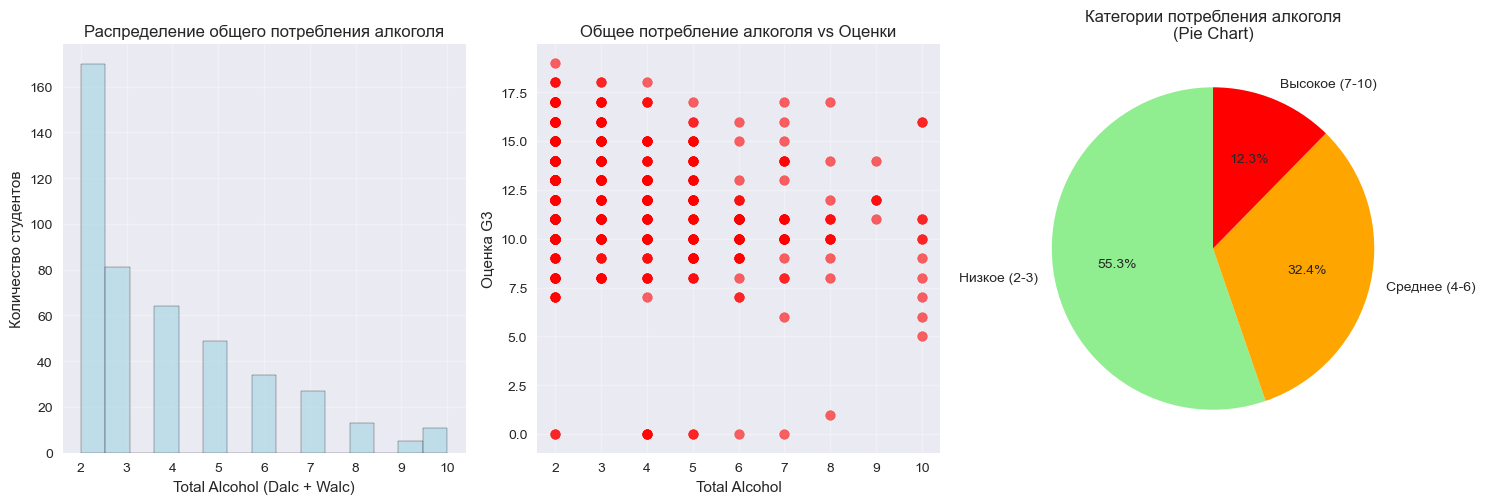

In [640]:
X_train_fixed = X_train_corrected.copy()

# 1. total_alc
X_train_fixed['total_alc'] = X_train_fixed['Dalc'] + X_train_fixed['Walc']
print("1. total_alc - ОБЩЕЕ ПОТРЕБЛЕНИЕ АЛКОГОЛЯ")
print("   Объединяет Dalc (будни) + Walc (выходные)")
print(f"   Диапазон: {X_train_fixed['total_alc'].min()}-{X_train_fixed['total_alc'].max()}")

# Визуализация для total_alc
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
X_train_fixed['total_alc'].hist(bins=15, edgecolor='black', alpha=0.7, color='lightblue')
plt.title('Распределение общего потребления алкоголя')
plt.xlabel('Total Alcohol (Dalc + Walc)')
plt.ylabel('Количество студентов')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.scatter(X_train_fixed['total_alc'], X_train_fixed['G3'], alpha=0.6, color='red')
plt.title('Общее потребление алкоголя vs Оценки')
plt.xlabel('Total Alcohol')
plt.ylabel('Оценка G3')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
alc_categories = X_train_fixed['total_alc'].apply(
    lambda x: 'Низкое (2-3)' if x <= 3 else 'Среднее (4-6)' if x <= 6 else 'Высокое (7-10)'
)
alc_cat_counts = alc_categories.value_counts()

plt.pie(alc_cat_counts.values, labels=alc_cat_counts.index, autopct='%1.1f%%', 
        colors=['lightgreen', 'orange', 'red'], startangle=90)
plt.title('Категории потребления алкоголя\n(Pie Chart)')

plt.tight_layout()
plt.show()


2. parent_education_score - ИНТЕГРАЛЬНЫЙ ПОКАЗАТЕЛЬ ОБРАЗОВАНИЯ РОДИТЕЛЕЙ
   Medu + Fedu / 2
   Диапазон: 0.0-4.0


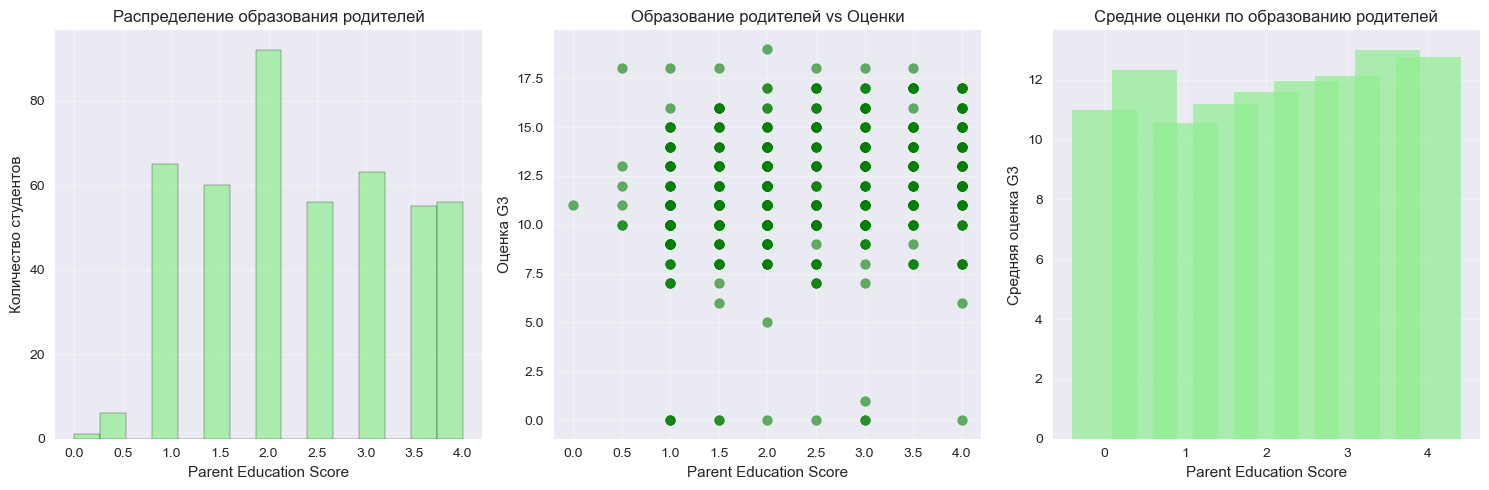

In [642]:
# 2. parent_education_score
print("\n2. parent_education_score - ИНТЕГРАЛЬНЫЙ ПОКАЗАТЕЛЬ ОБРАЗОВАНИЯ РОДИТЕЛЕЙ")
X_train_fixed['parent_education_score'] = (
    X_train_fixed['Medu'] + X_train_fixed['Fedu']
) / 2  # Среднее образование родителей

print(f"   Medu + Fedu / 2")
print(f"   Диапазон: {X_train_fixed['parent_education_score'].min():.1f}-{X_train_fixed['parent_education_score'].max():.1f}")

# Визуализация для parent_education_score
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
X_train_fixed['parent_education_score'].hist(bins=15, edgecolor='black', alpha=0.7, color='lightgreen')
plt.title('Распределение образования родителей')
plt.xlabel('Parent Education Score')
plt.ylabel('Количество студентов')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.scatter(X_train_fixed['parent_education_score'], X_train_fixed['G3'], alpha=0.6, color='green')
plt.title('Образование родителей vs Оценки')
plt.xlabel('Parent Education Score')
plt.ylabel('Оценка G3')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
education_grades = X_train_fixed.groupby('parent_education_score')['G3'].mean()
plt.bar(education_grades.index, education_grades.values, color='lightgreen', alpha=0.7)
plt.title('Средние оценки по образованию родителей')
plt.xlabel('Parent Education Score')
plt.ylabel('Средняя оценка G3')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


3. parent_employment - СТАТУС ЗАНЯТОСТИ РОДИТЕЛЕЙ
   0 - оба родителя не работают
   1 - один родитель работает
   2 - оба родителя работают
   Диапазон: 0-2


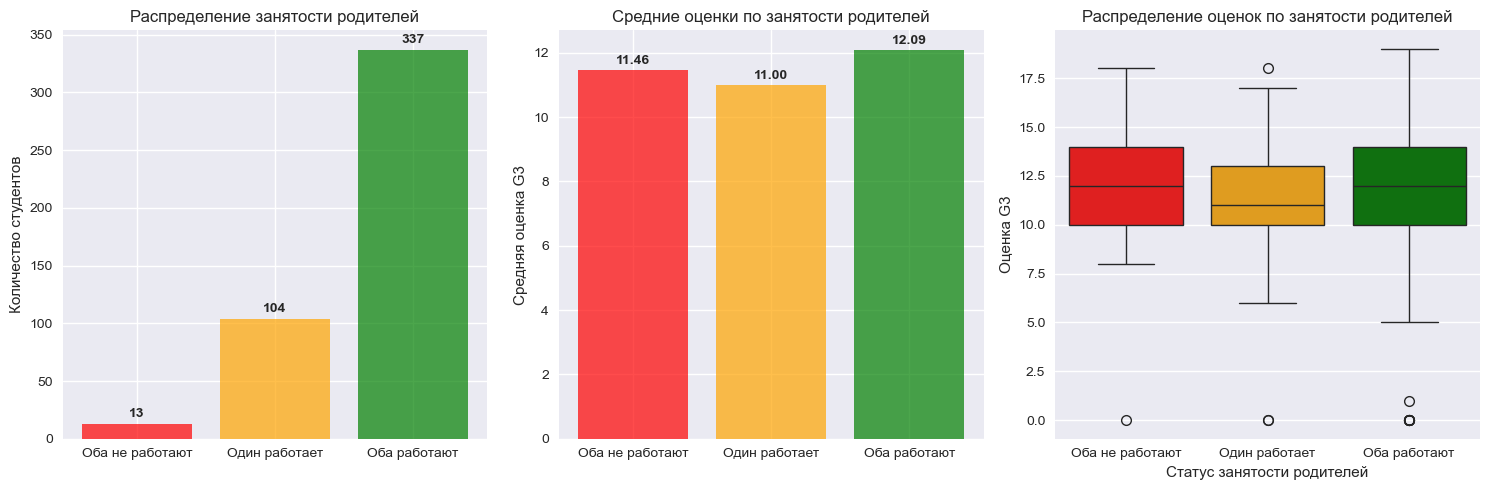


Финальные данные сохранены в 'X_train_fixed.csv'


In [644]:
# 3. parent_employment
print("\n3. parent_employment - СТАТУС ЗАНЯТОСТИ РОДИТЕЛЕЙ")

def get_parent_employment(row):
    mother_works = 0 if row['Mjob'] == 'at_home' else 1
    father_works = 0 if row['Fjob'] == 'at_home' else 1
    return mother_works + father_works

X_train_fixed['parent_employment'] = X_train_fixed.apply(get_parent_employment, axis=1)

print("   0 - оба родителя не работают")
print("   1 - один родитель работает") 
print("   2 - оба родителя работают")
print(f"   Диапазон: {X_train_fixed['parent_employment'].min()}-{X_train_fixed['parent_employment'].max()}")

# Визуализация для parent_employment
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
employment_counts = X_train_fixed['parent_employment'].value_counts().sort_index()
employment_labels = ['Оба не работают', 'Один работает', 'Оба работают']
plt.bar(employment_labels, employment_counts.values, color=['red', 'orange', 'green'], alpha=0.7)
plt.title('Распределение занятости родителей')
plt.ylabel('Количество студентов')

for i, count in enumerate(employment_counts.values):
    plt.text(i, count + max(employment_counts.values)*0.01, str(count), 
             ha='center', va='bottom', fontweight='bold')

plt.subplot(1, 3, 2)
employment_grades = X_train_fixed.groupby('parent_employment')['G3'].mean()
plt.bar(employment_labels, employment_grades.values, color=['red', 'orange', 'green'], alpha=0.7)
plt.title('Средние оценки по занятости родителей')
plt.ylabel('Средняя оценка G3')

for i, grade in enumerate(employment_grades.values):
    plt.text(i, grade + 0.1, f'{grade:.2f}', ha='center', va='bottom', fontweight='bold')

plt.subplot(1, 3, 3)
# Boxplot для более детального анализа
sns.boxplot(data=X_train_fixed, x='parent_employment', y='G3', 
            palette=['red', 'orange', 'green'])
plt.title('Распределение оценок по занятости родителей')
plt.xlabel('Статус занятости родителей')
plt.ylabel('Оценка G3')
plt.xticks([0, 1, 2], employment_labels)

plt.tight_layout()
plt.show()

X_train_fixed.to_csv('X_train_fixed.csv', index=False)
print(f"\nФинальные данные сохранены в 'X_train_fixed.csv'")

# Часть 3. Стратегия валидации

Итак, у вас есть данные для обучения и данные, на которых необходимо сделать предсказание. Для оценки точности необходимо проводить валидацию (так как мало данных, можно проводить кросс валидацию).
Валидацию проще всего реализовать методами sklearn, например:
- KFold
- ShuffleSplit
- StratifiedKFold
- StratifiedShuffleSplit
- GroupKFold
- GroupShuffleSplit

ЧАСТЬ 3. СТРАТЕГИЯ ВАЛИДАЦИИ
Размерность данных после кодирования: (454, 42)
Уникальные группы (школы): ['MS' 'GP']
Количество уникальных групп: 2

1. KFold ВАЛИДАЦИЯ:
-------------------------
   Количество фолдов: 5
   MSE scores: [8.06724679552383, 6.3143020089754325, 8.857790784223644, 8.074876186821065, 6.682779291916047]
   Среднее MSE: 7.599 ± 0.951

2. StratifiedKFold ВАЛИДАЦИЯ:
-----------------------------------
   Распределение по бинам: {0: 11, 1: 11, 2: 191, 3: 190, 4: 51}
   Количество фолдов: 5
   MSE scores: [9.13855620477194, 8.018374512223986, 7.475781517482192, 7.624970878449652, 6.31665472006158]
   Среднее MSE: 7.715 ± 0.910

3. ShuffleSplit ВАЛИДАЦИЯ:
------------------------------
   Количество сплитов: 5
   Размер теста: 20%
   MSE scores: [8.06724679552383, 6.187392272258531, 7.9106569564347335, 7.300670825208684, 5.987215802572622]
   Среднее MSE: 7.091 ± 0.861

4. GroupKFold ВАЛИДАЦИЯ:
   ❌ Недостаточно групп для GroupKFold

5. TimeSeriesSplit ВАЛИДАЦИЯ:
----

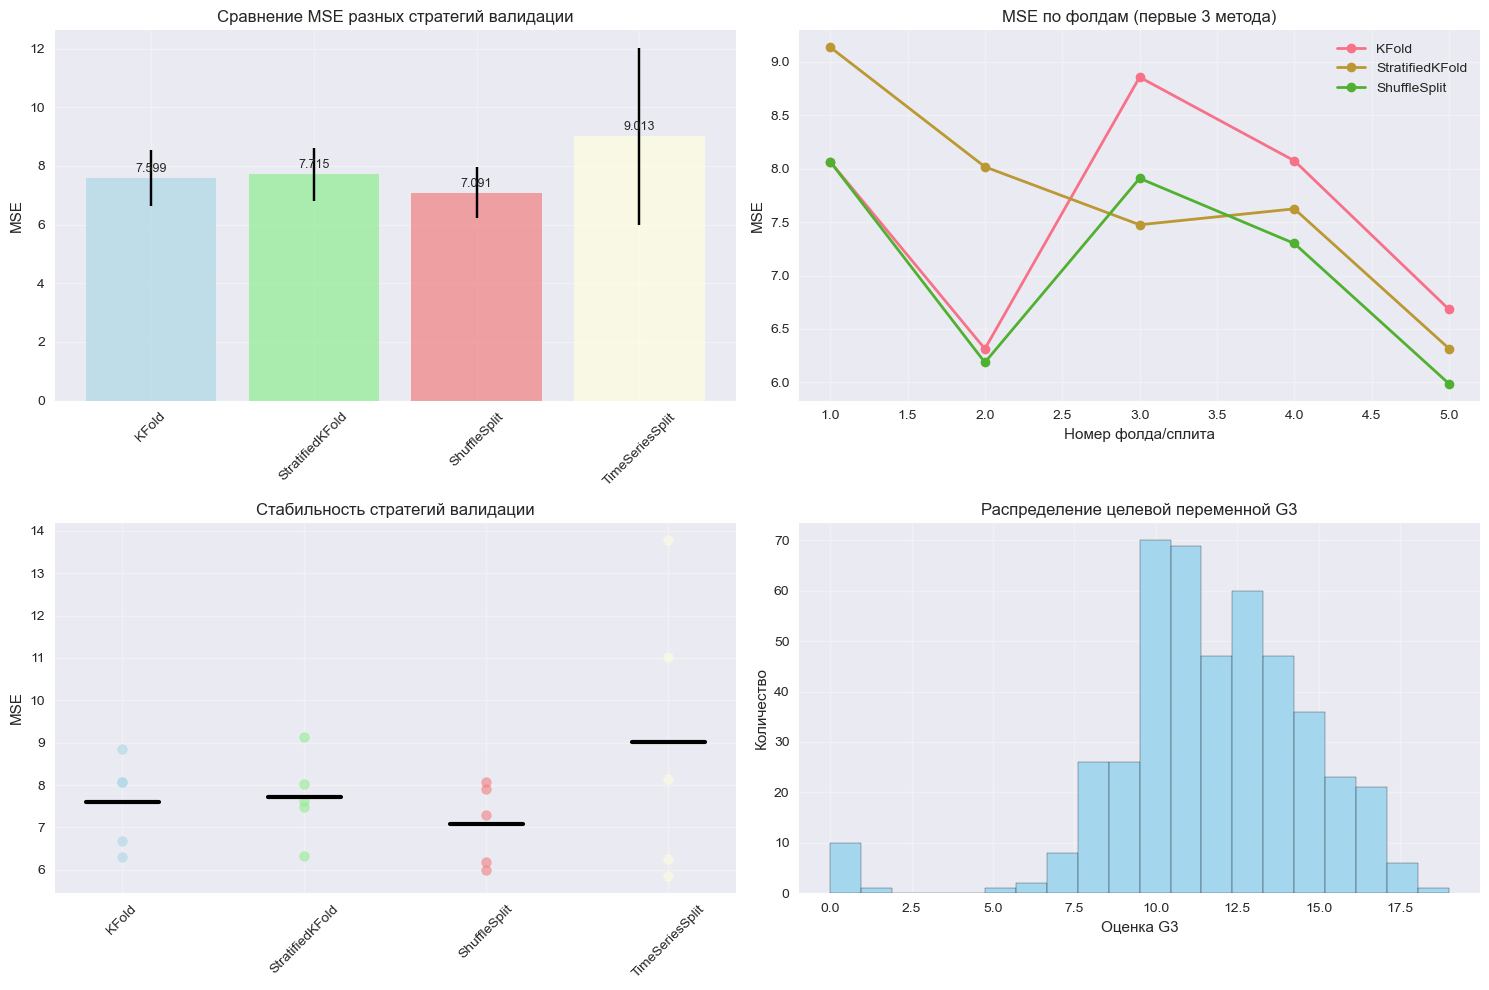


Закодированные данные сохранены в 'X_encoded_for_validation.csv'


In [663]:
print("ЧАСТЬ 3. СТРАТЕГИЯ ВАЛИДАЦИИ")
print("=" * 50)

from sklearn.model_selection import (KFold, ShuffleSplit, StratifiedKFold, 
                                   StratifiedShuffleSplit, GroupKFold, GroupShuffleSplit,
                                   cross_val_score)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np

# Подготовка данных для валидации
X = X_train_fixed.drop('G3', axis=1)
y = X_train_fixed['G3']

# Кодируем категориальные переменные для ML моделей
X_encoded = X.copy()

# One-Hot Encoding для категориальных признаков
categorical_cols = X_encoded.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    X_encoded = pd.get_dummies(X_encoded, columns=categorical_cols, drop_first=True)

print(f"Размерность данных после кодирования: {X_encoded.shape}")

# Создаем группы для групповой валидации
if 'school' in X_train_fixed.columns:
    groups = X_train_fixed['school']
    unique_groups = groups.unique()
    print(f"Уникальные группы (школы): {unique_groups}")
    print(f"Количество уникальных групп: {len(unique_groups)}")
else:
    # Если нет колонки school, создаем искусственные группы по возрасту
    groups = X_train_fixed['age'].astype(int) if 'age' in X_train_fixed.columns else None
    if groups is not None:
        print(f"Группы созданы по возрасту, уникальных групп: {len(groups.unique())}")

# Создаем базовую модель для тестирования стратегий
model = LinearRegression()
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# 1. KFold - стандартная кросс-валидация
print("\n1. KFold ВАЛИДАЦИЯ:")
print("-" * 25)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
kf_scores = cross_val_score(model, X_encoded, y, cv=kf, scoring=mse_scorer)
print(f"   Количество фолдов: 5")
print(f"   MSE scores: {[-score for score in kf_scores]}")
print(f"   Среднее MSE: {-kf_scores.mean():.3f} ± {kf_scores.std():.3f}")

# 2. StratifiedKFold - стратифицированная по бинам целевой переменной
print("\n2. StratifiedKFold ВАЛИДАЦИЯ:")
print("-" * 35)

# Для регрессии создаем бины целевой переменной для стратификации
y_binned = pd.cut(y, bins=5, labels=False)  # Создаем 5 бинов

# Проверяем, что в каждом бине достаточно данных
bin_counts = pd.Series(y_binned).value_counts().sort_index()
print(f"   Распределение по бинам: {bin_counts.to_dict()}")

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
skf_scores = cross_val_score(model, X_encoded, y, cv=skf, scoring=mse_scorer)
print(f"   Количество фолдов: 5")
print(f"   MSE scores: {[-score for score in skf_scores]}")
print(f"   Среднее MSE: {-skf_scores.mean():.3f} ± {skf_scores.std():.3f}")

# 3. ShuffleSplit - случайные разбиения
print("\n3. ShuffleSplit ВАЛИДАЦИЯ:")
print("-" * 30)
ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
ss_scores = cross_val_score(model, X_encoded, y, cv=ss, scoring=mse_scorer)
print(f"   Количество сплитов: 5")
print(f"   Размер теста: 20%")
print(f"   MSE scores: {[-score for score in ss_scores]}")
print(f"   Среднее MSE: {-ss_scores.mean():.3f} ± {ss_scores.std():.3f}")

# 4. GroupKFold - групповая валидация (если есть достаточно групп)
if groups is not None and len(groups.unique()) >= 3:  # Минимум 3 группы для 3 фолдов
    print("\n4. GroupKFold ВАЛИДАЦИЯ:")
    print("-" * 25)
    n_splits_group = min(3, len(groups.unique()))  # Максимум 3 фолда или количество групп
    gkf = GroupKFold(n_splits=n_splits_group)
    gkf_scores = cross_val_score(model, X_encoded, y, cv=gkf, scoring=mse_scorer, groups=groups)
    print(f"   Количество фолдов: {n_splits_group} (по количеству групп)")
    print(f"   MSE scores: {[-score for score in gkf_scores]}")
    print(f"   Среднее MSE: {-gkf_scores.mean():.3f} ± {gkf_scores.std():.3f}")
else:
    print("\n4. GroupKFold ВАЛИДАЦИЯ:")
    print("   ❌ Недостаточно групп для GroupKFold")
    gkf_scores = None

# 5. TimeSeriesSplit - для временных данных (альтернатива StratifiedShuffleSplit)
print("\n5. TimeSeriesSplit ВАЛИДАЦИЯ:")
print("-" * 30)
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)
tscv_scores = cross_val_score(model, X_encoded, y, cv=tscv, scoring=mse_scorer)
print(f"   Количество фолдов: 5")
print(f"   MSE scores: {[-score for score in tscv_scores]}")
print(f"   Среднее MSE: {-tscv_scores.mean():.3f} ± {tscv_scores.std():.3f}")

# Визуализация результатов валидации
plt.figure(figsize=(15, 10))

# Собираем все результаты для визуализации
all_scores = [kf_scores, skf_scores, ss_scores, tscv_scores]
all_labels = ['KFold', 'StratifiedKFold', 'ShuffleSplit', 'TimeSeriesSplit']
all_colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']

if gkf_scores is not None:
    all_scores.append(gkf_scores)
    all_labels.append('GroupKFold')
    all_colors.append('lightpurple')

# График 1: Сравнение MSE разных стратегий
plt.subplot(2, 2, 1)
scores_means = [-scores.mean() for scores in all_scores]
scores_stds = [scores.std() for scores in all_scores]

bars = plt.bar(all_labels, scores_means, yerr=scores_stds, capsize=5, 
               color=all_colors, alpha=0.7)
plt.title('Сравнение MSE разных стратегий валидации')
plt.ylabel('MSE')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Добавляем значения на столбцы
for bar, value in zip(bars, scores_means):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             f'{value:.3f}', ha='center', va='bottom', fontsize=9)

# График 2: Распределение оценок по фолдам
plt.subplot(2, 2, 2)
for i, scores in enumerate(all_scores[:3]):  # Показываем первые 3 метода
    fold_numbers = range(1, len(scores) + 1)
    plt.plot(fold_numbers, -scores, marker='o', linewidth=2, label=all_labels[i])
plt.title('MSE по фолдам (первые 3 метода)')
plt.xlabel('Номер фолда/сплита')
plt.ylabel('MSE')
plt.legend()
plt.grid(True, alpha=0.3)

# График 3: Стабильность стратегий
plt.subplot(2, 2, 3)
for i, scores in enumerate(all_scores):
    plt.scatter([i] * len(scores), -scores, alpha=0.6, color=all_colors[i], s=50)
    plt.plot([i-0.2, i+0.2], [-scores.mean()] * 2, 'k-', linewidth=3)

plt.xticks(range(len(all_labels)), all_labels, rotation=45)
plt.title('Стабильность стратегий валидации')
plt.ylabel('MSE')
plt.grid(True, alpha=0.3)

# График 4: Распределение целевой переменной
plt.subplot(2, 2, 4)
plt.hist(y, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Распределение целевой переменной G3')
plt.xlabel('Оценка G3')
plt.ylabel('Количество')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

X_encoded.to_csv('X_encoded_for_validation.csv', index=False)
print(f"\nЗакодированные данные сохранены в 'X_encoded_for_validation.csv'")

## Разделите данные и объясните выбор стратегии


АНАЛИЗ И ВЫБОР СТРАТЕГИИ ВАЛИДАЦИИ:
КРИТЕРИИ ВЫБОРА:
1. Стабильность (низкое std)
2. Средняя ошибка (низкое MSE)
3. Сохранение распределения данных
4. Интерпретируемость

РЕЗУЛЬТАТЫ:
KFold                MSE = 7.599 ± 0.951
StratifiedKFold      MSE = 7.715 ± 0.910
ShuffleSplit         MSE = 7.091 ± 0.861
TimeSeriesSplit      MSE = 9.013 ± 3.010

Используем стратегию: ShuffleSplit
Размер train: (363, 42)
Размер test: (91, 42)
Train/Test ratio: 80.0% / 20.0%

Распределение G3:
  Train: min=0, max=19, mean=11.88
  Test:  min=0, max=17, mean=11.59

✅ Данные разделены и сохранены:
   X_train_final.csv - (363, 42)
   X_test_final.csv - (91, 42)
   y_train_final.csv - (363,)
   y_test_final.csv - (91,)


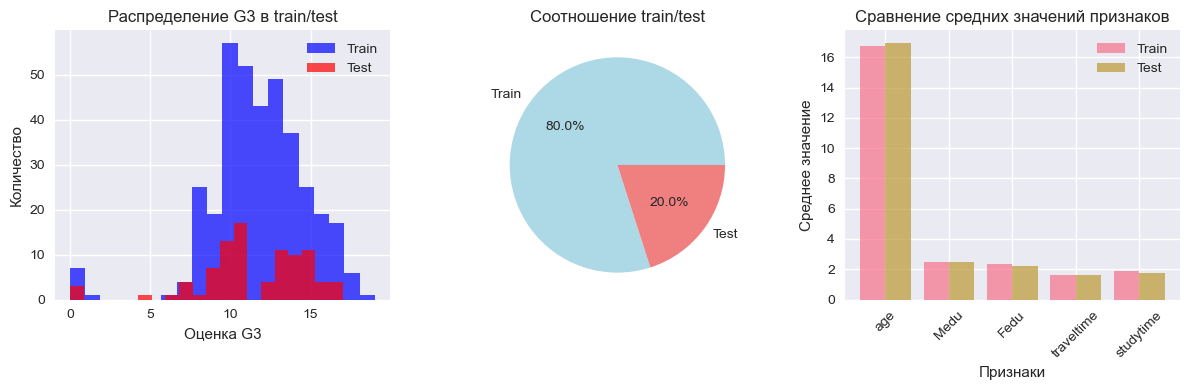

In [671]:
# Ваш код
print("\n" + "="*50)
print("АНАЛИЗ И ВЫБОР СТРАТЕГИИ ВАЛИДАЦИИ:")
print("="*50)

print("КРИТЕРИИ ВЫБОРА:")
print("1. Стабильность (низкое std)")
print("2. Средняя ошибка (низкое MSE)") 
print("3. Сохранение распределения данных")
print("4. Интерпретируемость")

print(f"\nРЕЗУЛЬТАТЫ:")
for i, label in enumerate(all_labels):
    print(f"{label:20} MSE = {-all_scores[i].mean():.3f} ± {all_scores[i].std():.3f}")

best_method_idx = np.argmin([-scores.mean() for scores in all_scores])
best_strategy = all_labels[best_method_idx]
print(f"\nИспользуем стратегию: {best_strategy}")

if best_strategy == 'StratifiedKFold':
    # Для стратифицированного разделения создаем бины
    y_binned = pd.cut(y, bins=5, labels=False)
    X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
        X_encoded, y, test_size=0.2, stratify=y_binned, random_state=42
    )
else:
    # Стандартное разделение
    X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
        X_encoded, y, test_size=0.2, random_state=42
    )

print(f"Размер train: {X_train_final.shape}")
print(f"Размер test: {X_test_final.shape}")
print(f"Train/Test ratio: {len(X_train_final)/len(X_encoded)*100:.1f}% / {len(X_test_final)/len(X_encoded)*100:.1f}%")

print(f"\nРаспределение G3:")
print(f"  Train: min={y_train_final.min()}, max={y_train_final.max()}, mean={y_train_final.mean():.2f}")
print(f"  Test:  min={y_test_final.min()}, max={y_test_final.max()}, mean={y_test_final.mean():.2f}")

X_train_final.to_csv('X_train_final.csv', index=False)
X_test_final.to_csv('X_test_final.csv', index=False)
y_train_final.to_csv('y_train_final.csv', index=False)
y_test_final.to_csv('y_test_final.csv', index=False)

print(f"\n✅ Данные разделены и сохранены:")
print(f"   X_train_final.csv - {X_train_final.shape}")
print(f"   X_test_final.csv - {X_test_final.shape}")
print(f"   y_train_final.csv - {y_train_final.shape}")
print(f"   y_test_final.csv - {y_test_final.shape}")

# 5. Визуализация разделения
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(y_train_final, bins=20, alpha=0.7, label='Train', color='blue')
plt.hist(y_test_final, bins=20, alpha=0.7, label='Test', color='red')
plt.title('Распределение G3 в train/test')
plt.xlabel('Оценка G3')
plt.ylabel('Количество')
plt.legend()

plt.subplot(1, 3, 2)
train_test_sizes = [len(X_train_final), len(X_test_final)]
plt.pie(train_test_sizes, labels=['Train', 'Test'], autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Соотношение train/test')

plt.subplot(1, 3, 3)
# Сравнение средних значений по признакам (пример для 5 случайных признаков)
sample_features = X_encoded.columns[:5] if len(X_encoded.columns) >= 5 else X_encoded.columns
train_means = X_train_final[sample_features].mean()
test_means = X_test_final[sample_features].mean()

x_pos = np.arange(len(sample_features))
plt.bar(x_pos - 0.2, train_means, 0.4, label='Train', alpha=0.7)
plt.bar(x_pos + 0.2, test_means, 0.4, label='Test', alpha=0.7)
plt.title('Сравнение средних значений признаков')
plt.xlabel('Признаки')
plt.ylabel('Среднее значение')
plt.xticks(x_pos, sample_features, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

__Ваш ответ:__ У ShuffleSplit самая маленькая погрешность

# Часть 4. Заполнение пропусков в данных

## Фильтрация по диапазону значений

Проверьте, что все характеристики принадлежат тому диапазону значений, который приведен в описании к исходным данным. Например, если в графе "Пол" есть значение FF, P или -1, то это явная ошибка заполнения.

Приведите данные в соответствии с описанием данных. Если значение указано неверно - укажите ```NaN```.

In [ ]:
# Ваш код
# Сделала до этого

## Адаптивное заполнения пропусков

Реализуйте стратегию заполнения пропусков данных на основе схожих примеров. Обучите один из известных вам алгоритмов (knn, Naive Bayes, linear regression) для предсказания той характеристики, пропуски которой присутсвуют в данных. В качестве характеристики для обучения алгоритмов __нельзя__ использовать ```G3```.

In [ ]:
# Ваш код

In [ ]:
# Сделала до этого (условия соблюдены)

# Часть 5. Обучение алгоритма

Целевая переменная принимает дискретные значения [0; 20], поэтому вы можете поставить как задачу классификации, так и задачу регрессии.

!Не забудьте про оптимизацию параметров алгоритмов, у вас же уже есть данные для валидации.

## KNN

## Bayes

## Регрессия

## SVM

## Постройте сложную модель на основе предыдущих четырех простых и оцените ее точность

Вариант 1. Нужно взвесить предсказания простых моделей. Предложите метод взвешивания.

Вариант 2. Нужно оценить корреляцию предсказаний простых моделей.

## Сделайте итоговое предсказание

Решением домашнего задания является данный ноутбук + .csv файл с предсказанием. Пример формата файла, который должен у вас получится приведен в ```data/sample_submission.csv```. Данные для предсказания - ```X_test.csv```.

Значения предсказаний должны быть целочисленными. Проверка будет точности решения будет по MSE.

In [ ]:
# Для jupyter notebook

submission = pd.read_csv('data/sample_submission.csv', index_col='id')
submission['G3'] = 1 # ваше предсказание
submission.to_csv('data/submission.csv', index=False)

In [ ]:
# Для colab notebook

from google.colab import files

pd.read_csv('data/sample_submission.csv', index_col='id')
submission['G3'] = 1 # ваше предсказание
submission.to_csv('data/submission.csv', index=False)
files.download('data/submission.csv')

# Часть 6. Состязательная валидация (Adversarial Validation)

Данная стратегия часто применяется в соревнованиях по машинному обучению. Так как проверить свой алгоритм возможно только на заданном тренировочном наборе данных, а результат требуется к набору, для которого нет ответов, то выбирают следующий подход:
- оценить степень схожести тренировочных и тестовых данных;
- составить валидацию из тех тренировочных данных, которые больше похожи на тестовые.

Алгоритм реализации AV:
1. Удаляем ответы из тренировочных данных.
2. Добавляем специальные метки (```is_test```) для классов: тренировочные данные и тестовые.
То есть у тестовых данных будет значение ```is_test = 1```, а у тренировочных ```is_test = 0```.
4. Учим алгоритм классификации предсказывать заданную метку ```is_test```.
5. Делим тренировочные данные на N частей и проводим кросс-валидацию.

Обучаем N алгоритмов классификации: каждый обучается на всех тестовых данных и на N-1 наборах тренировочных. Предсказываем на 1 тренировочном наборе.

6. Для каждого элемента в выборке предсказываем вероятность принадлежности класса и сортируем тренировочные данные по вероятности принадлежности тестовой выборке.
7. Выделяем заданное число данных в валидацию.
8. Обучаемся для итогового предсказания на всех данных.
9. Смотрим метрики AUC-ROC